In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import missingno as msno

# 1. Description du jeu de données

In [2]:
# Importation du jeu de données
building_data = pd.read_csv("2016_Building_Energy_Benchmarking.csv")

In [3]:
# Taille du jeu de données
print("Le jeu de données contient {} lignes et {} et colonnes.".format(building_data.shape[0], building_data.shape[1]))

Le jeu de données contient 3376 lignes et 46 et colonnes.


In [4]:
# Visualition de 5 lignes sélectionnés de manière aléatoire
pd.set_option("display.max_columns", 46)
building_data.sample(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
2682,26593,2016,NonResidential,Small- and Mid-Sized Office,Delmar Building,108 South Washington St,Seattle,WA,98104.0,5247800481,7,DOWNTOWN,47.60102,-122.33378,1900,1.0,4,22840,0,22840,"Office, Other",Office,18400.0,Other,4440.0,NaN,NaN,NaN,64.0,38.599998,43.000000,121.199997,135.100006,8.813862e+05,9.830534e+05,0.0,2.583195e+05,881386.0,0.000000,0.0,True,NaN,Error - Correct Default Data,NaN,6.14,0.27
1041,20604,2016,NonResidential,Distribution Center,MCNIVEN,20-24 S. Idaho Street,Seattle,WA,98134.0,1824049012,2,GREATER DUWAMISH,47.56489,-122.34090,1955,1.0,1,26680,0,26680,Distribution Center,Distribution Center,33987.0,NaN,NaN,NaN,NaN,NaN,92.0,7.200000,7.200000,22.500000,22.500000,2.435182e+05,2.435182e+05,0.0,7.137110e+04,243518.0,0.000000,0.0,False,NaN,Compliant,NaN,1.70,0.06
3024,27903,2016,NonResidential,Retail Store,(ID27903) PACIFIC RIM CENTER,900 S JACKSON ST,Seattle,WA,98104.0,6600770000,2,DOWNTOWN,47.59951,-122.32033,2000,1.0,3,54969,0,54969,Retail Store,Retail Store,54969.0,NaN,NaN,NaN,NaN,NaN,67.0,67.699997,68.599998,201.699997,202.600006,3.724098e+06,3.770784e+06,0.0,1.006654e+06,3434704.0,2893.939941,289394.0,False,NaN,Compliant,NaN,39.31,0.72
864,20052,2016,NonResidential,Retail Store,WEST BLDG,4629 26th Avenue NE,Seattle,WA,98105.0,0925049346,4,NORTHEAST,47.66246,-122.29898,1997,1.0,1,63153,0,63153,"Non-Refrigerated Warehouse, Other, Retail Store",Retail Store,59396.0,Non-Refrigerated Warehouse,2757.0,Other,1000.0,NaN,NaN,73.500000,74.000000,219.899994,217.500000,4.644178e+06,4.670313e+06,0.0,1.264044e+06,4312919.0,3312.580322,331258.0,False,NaN,Compliant,NaN,47.66,0.75
2853,27213,2016,Multifamily LR (1-4),Low-Rise Multifamily,Lockshore Condominium,3200 W Commodore Way,Seattle,WA,98199.0,4395400000,7,MAGNOLIA / QUEEN ANNE,47.66443,-122.39802,1965,1.0,3,28944,0,28944,"Multifamily Housing, Swimming Pool",Multifamily Housing,24111.0,Swimming Pool,0.0,NaN,NaN,NaN,39.0,35.900002,38.099998,107.099998,115.099998,8.647518e+05,9.175740e+05,0.0,2.348622e+05,801350.0,634.020019,63402.0,False,NaN,Compliant,NaN,8.95,0.31


Chaque ligne correspond à un bâtiment. Nous avons donc 3376 bâtiments dont les informations pour chacun d'eux sont renseignées dans 46 colonnes (variables).

In [5]:
# Obtention de la liste des colonnes
building_data.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

La variable "ENERGYSTARScore" évalue la performance énergétique globale d’une propriété. <br>
La variable "SiteEnergyUse" renseigne la quantité annuelle d’énergie consommée par le bâtiment à partir de toutes les sources d’énergie. <br>

Les deux dernières colonnes renseignent sur la quantité total d'émission de gaz à effet de serre :
- TotalGHGEmissions = quantité totale d’émissions de gaz à effet de serre, rejetés dans l’atmosphère en raison de la consommation d’énergie sur la propriété ;
- GHGEmissionsIntensity = Émissions totales de gaz à effet de serre divisées par la surface de plancher de la propriété ;

"SiteEnergyUse", "TotalGHGEmissions" et "GHGEmissionsIntensity" représentent les variables à prédire pour le modèle de modélisation.

In [6]:
# types de données de chaque colonne
building_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3376 entries, 0 to 3375
Data columns (total 46 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    3376 non-null   int64  
 1   DataYear                         3376 non-null   int64  
 2   BuildingType                     3376 non-null   object 
 3   PrimaryPropertyType              3376 non-null   object 
 4   PropertyName                     3376 non-null   object 
 5   Address                          3376 non-null   object 
 6   City                             3376 non-null   object 
 7   State                            3376 non-null   object 
 8   ZipCode                          3360 non-null   float64
 9   TaxParcelIdentificationNumber    3376 non-null   object 
 10  CouncilDistrictCode              3376 non-null   int64  
 11  Neighborhood                     3376 non-null   object 
 12  Latitude            

L'observation de la sortie ci-dessus indique des variables redondantes telles que : "SiteEUI", "Electricity", "NaturalGas"... Mais aussi plusieurs variables ont des valeurs manquantes : la variable "Comments" ne contient aucune valeur et la variable "Outlier" ne renseigne que 32 variables.

In [7]:
# Somme des données manquantes dans le jeu de données
x = building_data.isna().sum().sum()
print("Le jeu de données contient", x, "données manquante")

Le jeu de données contient 19952 données manquante


Dans quelle mesure la présence ou l'absence d'une variable affecte la présence d'une autre ? <br> La carte thermique du package missingno permet de mesurer la corrélation de nullité.

<AxesSubplot:>

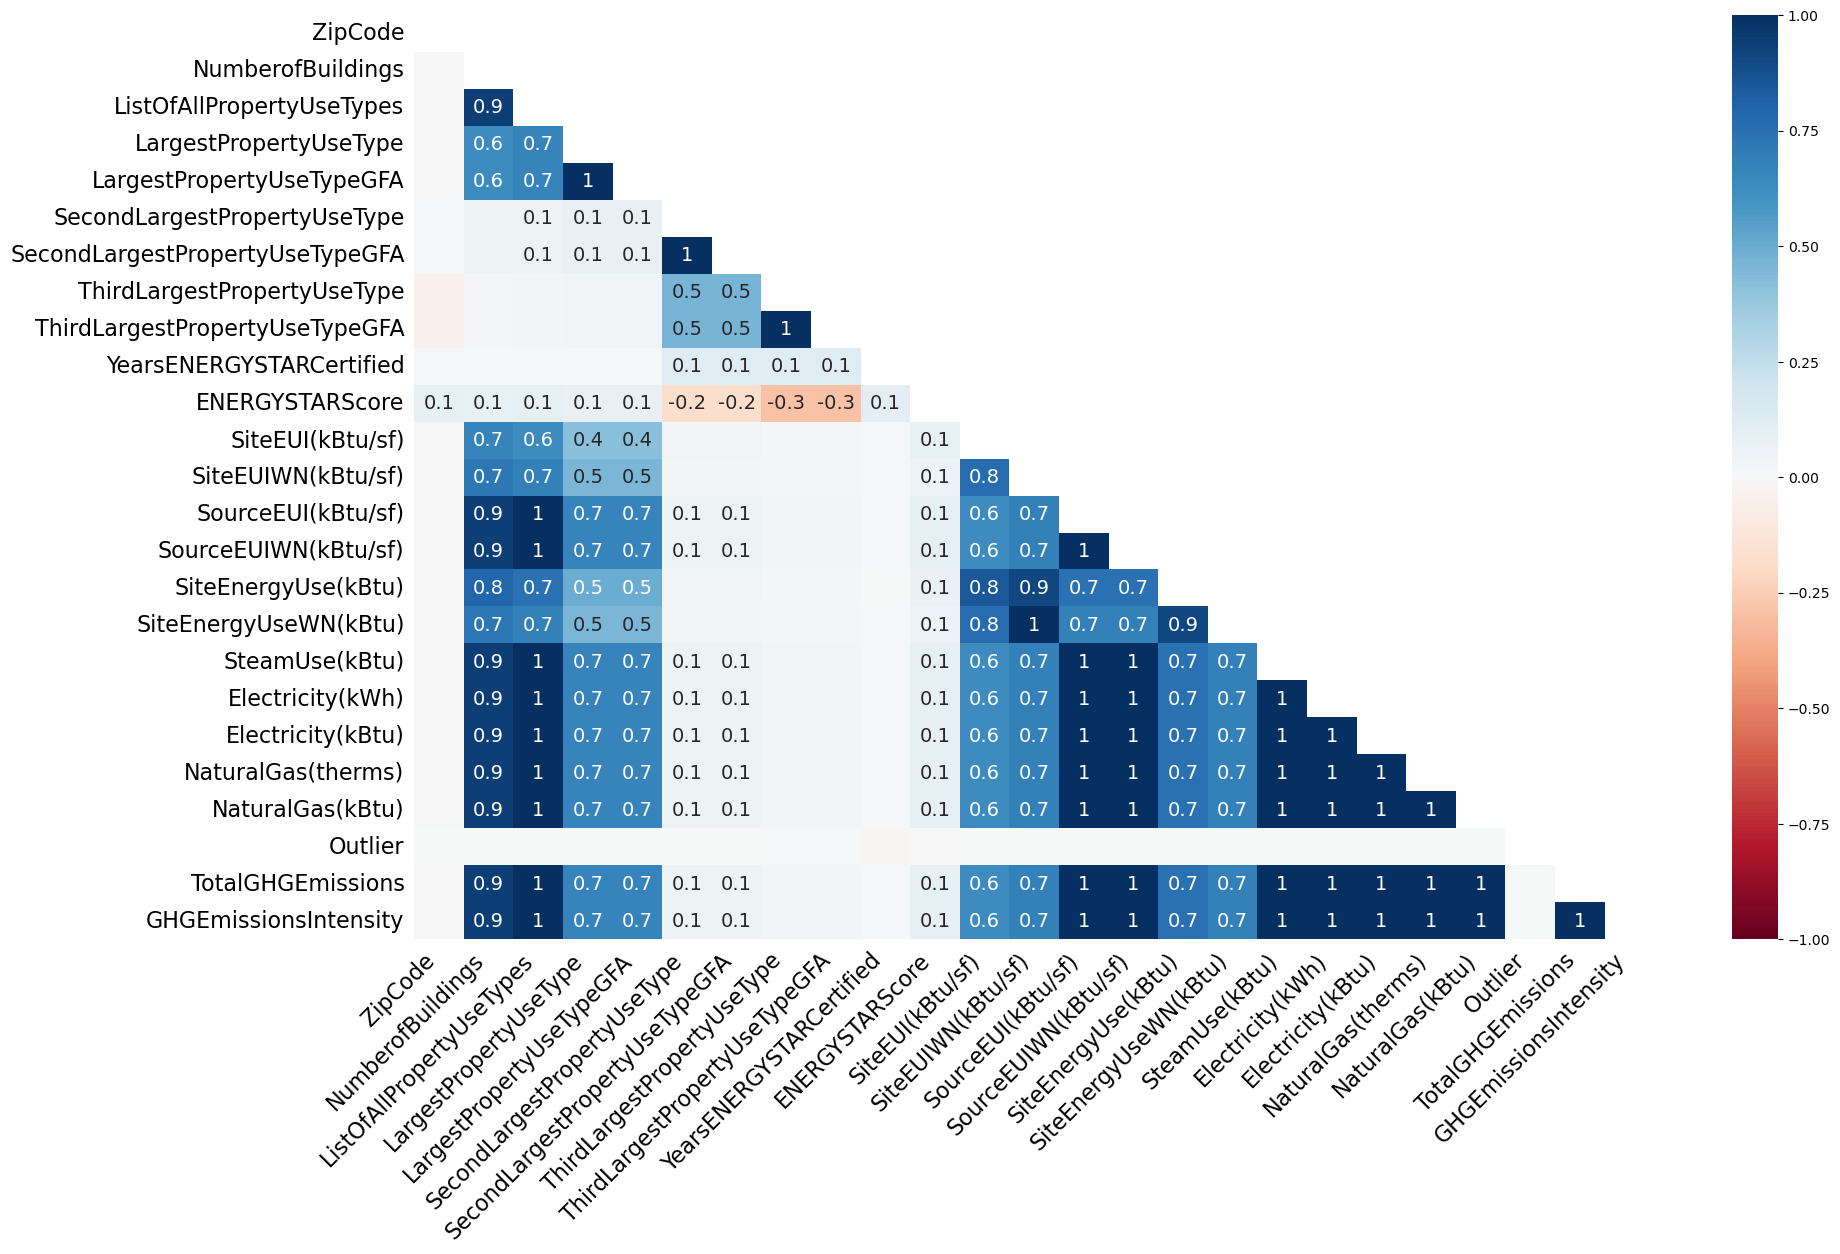

In [8]:
# A quel point ces valeurs manquantes affectent les autres variables ?
msno.heatmap(building_data)

Les variables entièrement vides n'ont pas de corrélation significative et sont donc supprimées silencieusement de la visualisation. C'est le cas de la variable "**comments**". <br>
Les variables "**outlier**" et "**YearsENERGYSTARCertified**" contiennent plus de 95% de valeurs manquantes et sont très peu corrélées aux autres variables. De plus, la documentation ne précise à quoi correspondent les outliers. On pourrait les supprimer lors du nettoyage sans risque. <br>
Les autres variables présentes beaucoup de valeurs manquantes présentent des corrélations avec les autres variables. On devrait donc procéder à l'emputation de ces valeurs manquantes lors du nettoyage des données.

In [9]:
# Recherche des doublons
building_data.duplicated().sum()

0

Le jeu de données ne contient aucun doublons.

# 2. Nettoyage des données

## 2.1. Restriction des données aux batiments non destinées à l'habitation

L'objectif de la mission est de s'intéresser à la consommation et aux émissions des gaz à effet de serre des bâtiments non destinés à l’habitation. De ce fait, je procède à la suppression des bâtiments destinés à l'habitation du jeu de données. <br>

Les informations relatives à la nature  des habitations sont renseignées dans les variables "BuildingType" et "PrimaryPropertyType".

In [10]:
# Affichage des valeurs de la variables "PrimaryPropertyType"
building_data["PrimaryPropertyType"].unique()

array(['Hotel', 'Other', 'Mid-Rise Multifamily', 'Mixed Use Property',
       'K-12 School', 'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Low-Rise Multifamily',
       'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'High-Rise Multifamily',
       'Office'], dtype=object)

Les valeurs renseignants les habitations destinées à l'habitation et qui devront être supprimées sont : "Mid-Rise Multifamily", "Mixed Use Property", "Low-Rise Multifamily" et "High-Rise Multifamily"

In [11]:
# Affichage des valeurs de la variables "BuildingType"
building_data["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'Multifamily MR (5-9)',
       'SPS-District K-12', 'Campus', 'Multifamily LR (1-4)',
       'Multifamily HR (10+)', 'Nonresidential WA'], dtype=object)

Les valeurs renseignants les habitations destinées à l'habitation et qui devront être supprimées sont : "Multifamily MR (5-9)", "Multifamily LR (1-4)" et "Multifamily HR (10+)".

**_Suppression des valeurs renseignants les bâtiments destinées aux habitations à partir de la variable "BuildingType"_**

In [12]:
# Suppression des bâtiments destinés à l'habitation à partir de la variable "BuildingType"
building_data = building_data[~building_data["BuildingType"].str.contains("Multifamily")]
building_data["BuildingType"].unique()

array(['NonResidential', 'Nonresidential COS', 'SPS-District K-12',
       'Campus', 'Nonresidential WA'], dtype=object)

In [13]:
building_data["PrimaryPropertyType"].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Low-Rise Multifamily',
       'Office'], dtype=object)

La valeur "Low-Rise Multifamily" n'a pas été supprimé.

In [14]:
building_data = building_data[~building_data["PrimaryPropertyType"].str.contains("Low-Rise Multifamily")]
building_data["PrimaryPropertyType"].unique()

array(['Hotel', 'Other', 'Mixed Use Property', 'K-12 School',
       'University', 'Small- and Mid-Sized Office',
       'Self-Storage Facility', 'Warehouse', 'Large Office',
       'Senior Care Community', 'Medical Office', 'Retail Store',
       'Hospital', 'Residence Hall', 'Distribution Center',
       'Worship Facility', 'Supermarket / Grocery Store', 'Laboratory',
       'Refrigerated Warehouse', 'Restaurant', 'Office'], dtype=object)

In [15]:
print("Le jeu de données compte à présent {} lignes et {} colonnes.".format(building_data.shape[0], building_data.shape[1]))

Le jeu de données compte à présent 1665 lignes et 46 colonnes.


## 2.2. Suppression des variables redondantes et celles avec trop de NaN

In [16]:
print("Avant la suppression des variables redondantes, le jeu de données comprend {} lignes et {} colonnes ".
      format(building_data.shape[0], building_data.shape[1]))

Avant la suppression des variables redondantes, le jeu de données comprend 1665 lignes et 46 colonnes 


### a. Suppression des variables redondantes 

Les variables redondantes sont celles avec le suffixe WN et les variables "Electricity" et "NaturalGas".

In [17]:
# Suppression des variables avec le suffixe WN
def recherche_composante(data, suffixe = None):
    composante = []
    for col in data.columns:
        if suffixe in col:
            composante.append(col)
    return composante

In [18]:
building_data.drop(recherche_composante(building_data, suffixe = "WN"), axis = 1, inplace = True)

In [19]:
# Suppression des variables Electrity et NaturalGas redondantes
building_data = building_data.drop(columns = ["Electricity(kWh)", "NaturalGas(therms)"])

In [20]:
print("Après la suppression des variables redondantes, le jeu de données comprend {} lignes et {} colonnes ".
      format(building_data.shape[0], building_data.shape[1]))

Après la suppression des variables redondantes, le jeu de données comprend 1665 lignes et 41 colonnes 


### b. Suppression des variables avec trop de valeurs manquantes et non pertinentes
La suppression des variables "Comments" et "YearsENERGYSTARCertified" se fera sur la base des informations fournies par la carte thermique de la matrice de corrélation de nullité affichée précédemment.

In [21]:
building_data = building_data.drop(columns = ["Comments", "Outlier", "YearsENERGYSTARCertified"])

In [22]:
building_data.shape

(1665, 38)

Dans le cadre de la modélisation à réaliser, les variables à prédire sont la consommation d'énergie du bâtiment (SiteEnergyUse(kBtu) et ses émissions de CO2 (TotalGHGEmissions). Certaines lignes comportent des manquants sur ces variables, nous allons donc les supprimer :

In [23]:
building_data = building_data.dropna(subset=['ENERGYSTARScore', 'TotalGHGEmissions'], how = "all")

In [24]:
building_data.shape

(1663, 38)

### c. Imputation des valeurs manquantes 

<AxesSubplot:>

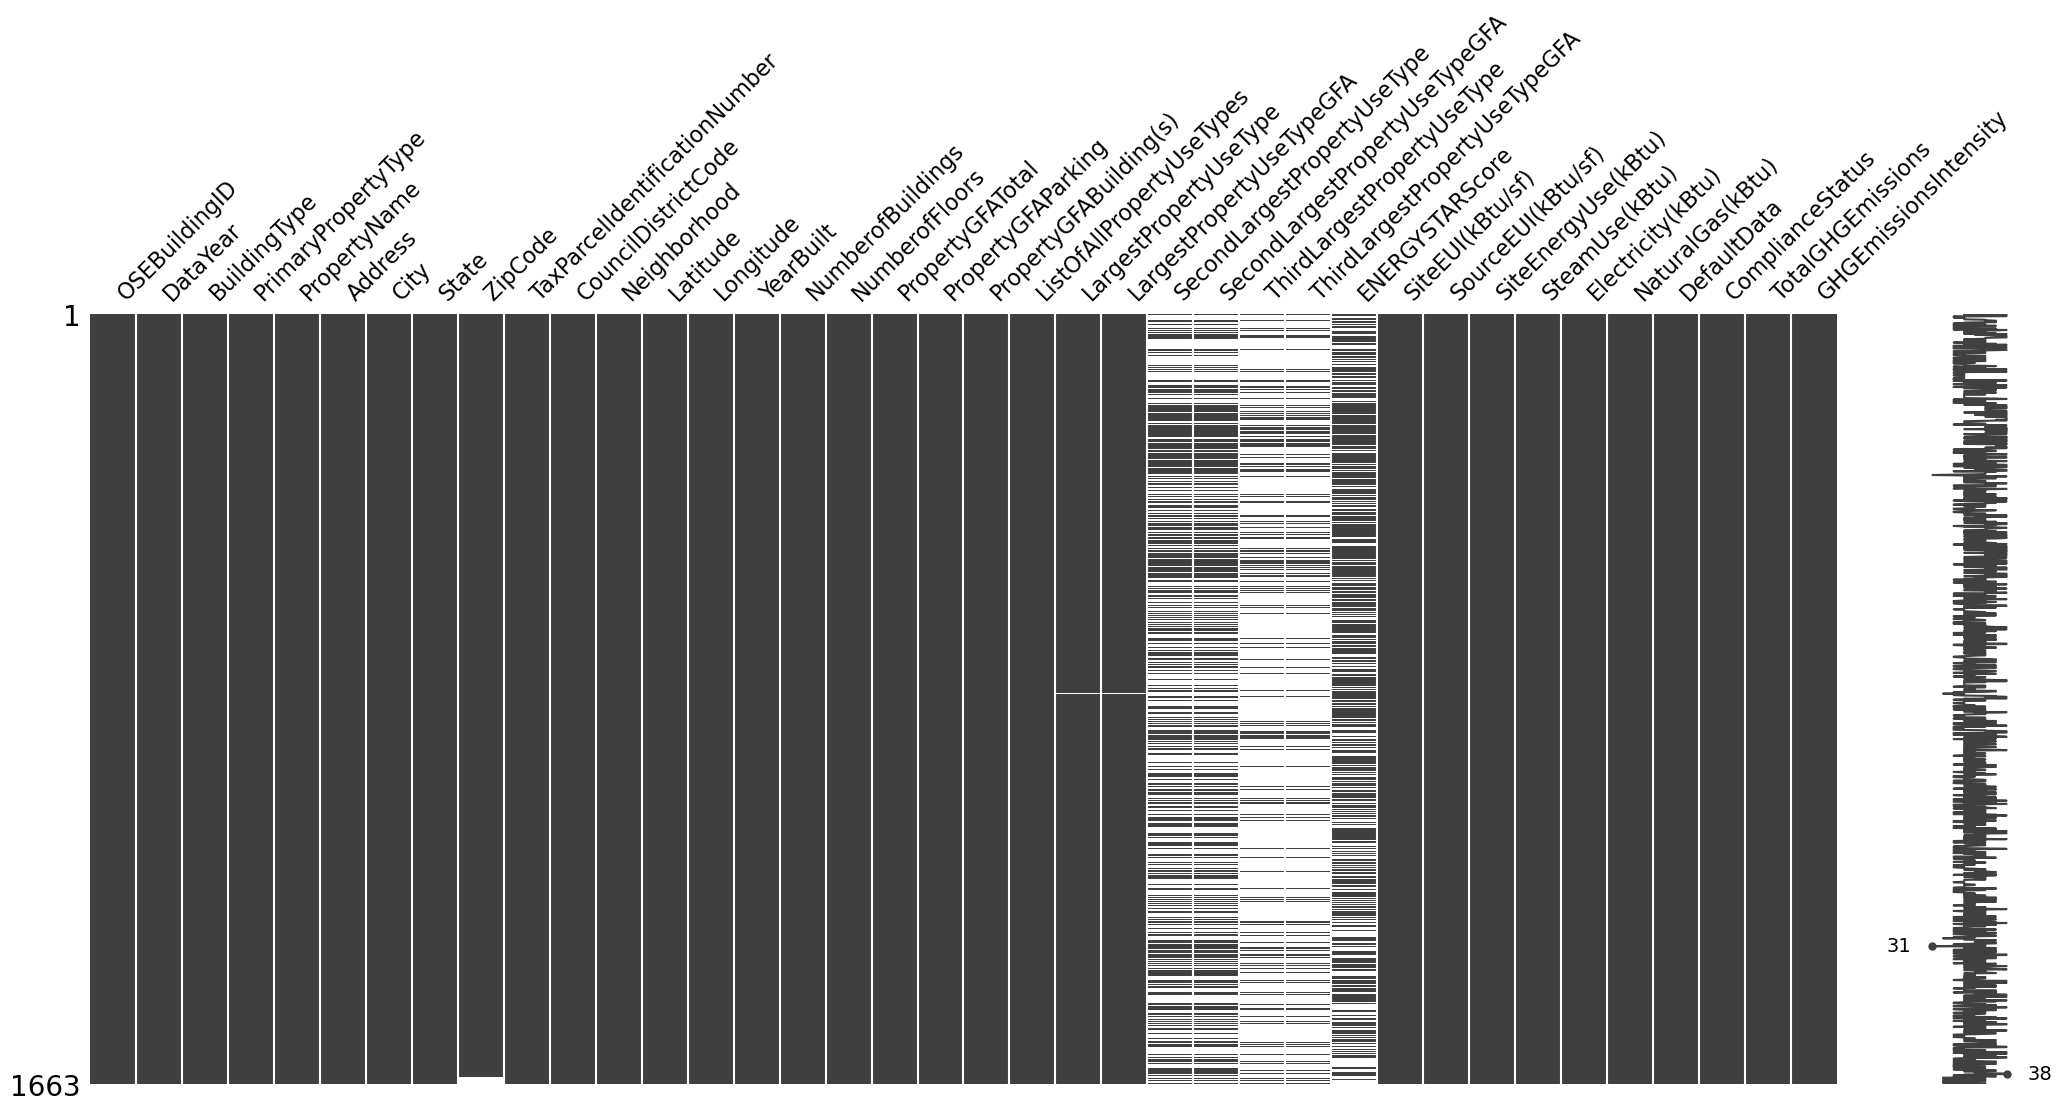

In [25]:
# Visualisation rapide de la matrix des données
msno.matrix(building_data)

#### Les variables relatives à la grandeur d'utilisation des propriétés
Il s'agit ici d'imputer les valeurs manquantes des variables "LargestPropertyUseType", "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseType", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseType" et "ThirdLargestPropertyUseTypeGFA".

In [26]:
building_data[["LargestPropertyUseType", "LargestPropertyUseTypeGFA", "SecondLargestPropertyUseType", "SecondLargestPropertyUseTypeGFA", "ThirdLargestPropertyUseType", "ThirdLargestPropertyUseTypeGFA"]]

,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA
0,Hotel,88434.0,NaN,NaN,NaN,NaN
1,Hotel,83880.0,Parking,15064.0,Restaurant,4622.0
2,Hotel,756493.0,NaN,NaN,NaN,NaN
3,Hotel,61320.0,NaN,NaN,NaN,NaN
4,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0
...,...,...,...,...,...,...
3371,Office,12294.0,NaN,NaN,NaN,NaN
3372,Other - Recreation,16000.0,NaN,NaN,NaN,NaN
3373,Other - Recreation,7583.0,Fitness Center/Health Club/Gym,5574.0,Swimming Pool,0.0
3374,Other - Recreation,6601.0,Fitness Center/Health Club/Gym,6501.0,Pre-school/Daycare,484.0


Les variables avec le préfixe "GFA" représente La surface utiliser pour les variables "PropertyUse" correspondante. <br> Pour un index donné, lorsqu'une valeur est manquante dans la variable "propertyUse", elle l'est également dans la variable au préfixe "GFA" correspondante. <br> Ainsi, les valeurs manquantes des variables "GFA" sont des valeurs nulles, je vais les imputer par des 0.

In [27]:
building_data.loc[:, 
                  ("SecondLargestPropertyUseTypeGFA", 
                   "LargestPropertyUseTypeGFA", 
                   "ThirdLargestPropertyUseTypeGFA")] = building_data.loc[:, 
                                                                          ("SecondLargestPropertyUseTypeGFA", 
                                                                           "LargestPropertyUseTypeGFA", 
                                                                           "ThirdLargestPropertyUseTypeGFA")].fillna(0)

en ce qui concernent les variables "LargestPropertyUseType", "SecondLargestPropertyUseType" et ThirdLargestPropertyUseType, lorsqu'une valeur n'est pas renseignée, il y a de forte chance que la valeur ne soit pas connue.

In [28]:
building_data.loc[:,('LargestPropertyUseType',"SecondLargestPropertyUseType", 
                  "ThirdLargestPropertyUseType")] = building_data.loc[:,('LargestPropertyUseType',"SecondLargestPropertyUseType",
                                                                    "ThirdLargestPropertyUseType")].fillna("Unknown")

#### ENERGYSTARScore
Ce score est généré automatiquement par un algorithme. Par manque d'information dans la documentation, les valeurs manquantes de cette variable ne seront pas imputées.

## 2.3. Recherche des erreurs de remplissage (valeurs aberrantes)

Dans un premier temps, nous allons rechercher et traiter les valeurs aberrantes à partir de la description statistiques des variables. Et ensuite afficher les boîtes à moustache des variables pour observer les outliers (et éventuellement les valeurs aberrantes non traitées).

In [29]:
# Affichage des statistiques descriotives du jeu de données
building_data.describe(include = "all")

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
count,1663.000000,1663.0,1663,1663,1663,1663,1663,1663,1647.000000,1663,1663.000000,1663,1663.00000,1663.000000,1663.00000,1663.000000,1663.000000,1.663000e+03,1663.000000,1.663000e+03,1663,1663,1.663000e+03,1663,1663.000000,1663,1663.000000,1093.000000,1662.000000,1663.000000,1.663000e+03,1.663000e+03,1.663000e+03,1.663000e+03,1663,1663,1663.000000,1663.000000
unique,NaN,NaN,5,21,1659,1642,1,1,NaN,1582,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,370,57,NaN,48,NaN,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,4,NaN,NaN
top,NaN,NaN,NonResidential,Small- and Mid-Sized Office,South Park,2600 SW Barton St,Seattle,WA,NaN,1625049001,NaN,DOWNTOWN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Office,Office,NaN,Unknown,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Compliant,NaN,NaN
freq,NaN,NaN,1456,291,2,4,1663,1663,NaN,8,NaN,359,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,138,497,NaN,810,NaN,1311,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1575,1546,NaN,NaN
mean,16328.996392,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98116.849423,NaN,4.354781,NaN,47.61602,-122.332922,1961.97715,1.168972,4.123873,1.190469e+05,12915.054720,1.061319e+05,NaN,NaN,9.862404e+04,NaN,18909.442151,NaN,3165.484305,65.480329,72.222563,175.945701,8.449617e+06,5.134972e+05,5.850707e+06,1.974190e+06,NaN,NaN,185.272616,1.610132
std,13845.888812,0.0,NaN,NaN,NaN,NaN,NaN,NaN,18.445589,NaN,2.192137,NaN,0.04822,0.024609,32.72543,2.934044,6.572949,2.977825e+05,42329.497628,2.846169e+05,NaN,NaN,2.766573e+05,NaN,53344.233051,NaN,17998.258333,28.487977,74.084783,186.018109,3.026977e+07,5.518875e+06,2.081469e+07,9.378935e+06,NaN,NaN,752.621187,2.338357
min,1.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98006.000000,NaN,1.000000,NaN,47.49917,-122.411820,1900.00000,0.000000,0.000000,1.128500e+04,0.000000,3.636000e+03,NaN,NaN,0.000000e+00,NaN,0.000000,NaN,0.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-1.154170e+05,0.000000e+00,NaN,NaN,-0.800000,-0.020000
25%,581.500000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98105.000000,NaN,2.000000,NaN,47.58535,-122.343300,1930.00000,1.000000,1.000000,2.945750e+04,0.000000,2.845850e+04,NaN,NaN,2.550000e+04,NaN,0.000000,NaN,0.000000,48.000000,33.700001,76.599998,1.230468e+06,0.000000e+00,7.217060e+05,0.000000e+00,NaN,NaN,20.005000,0.350000
50%,21142.000000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98109.000000,NaN,4.000000,NaN,47.61234,-122.332940,1965.00000,1.000000,2.000000,4.929900e+04,0.000000,4.741500e+04,NaN,NaN,4.366100e+04,NaN,0.000000,NaN,0.000000,73.000000,51.900002,131.000000,2.556131e+06,0.000000e+00,1.611215e+06,5.037650e+05,NaN,NaN,49.620000,0.880000
75%,24601.500000,2016.0,NaN,NaN,NaN,NaN,NaN,NaN,98125.000000,NaN,7.000000,NaN,47.64970,-122.321725,1989.00000,1.000000,4.000000,1.060205e+05,0.000000,9.492400e+04,NaN,NaN,9.196750e+04,NaN,12693.000000,NaN,0.000000,89.000000,81.649998,203.900002,6.917379e+06,0.000000e+00,4.863081e+06,1.522622e+06,NaN,NaN,142.865000,1.895000


On peut noter des valeurs surprenantes comme :
- Le nombre minimal de bâtiment (NumberofBuildings) est 0. On ne peut avoir de propriété sans bâtiment, il doit donc s'agit d'une erreur de renseignement. Les valeurs 0 de la variable "NumberofBuildings" seront imputées par 1 ;
- Des consommations électriques (Electricity(kBtu)) et des émissions de gaz (NaturalGas(kBtu)) négatives  qui seront suprimmées. Toutefois, les valeurs négatives indiquent que le bâtiment "produit" sa propre énergie et que sa consommation est inférieure à sa production ;
- Des bâtiments avec 99 étages ;
- 111 bâtiments dans une propriété ;

**_Traitements des valeurs aberrantes de la variable "NumberofBuildings"_**

In [30]:
# Imputation des valeurs nulles de la variables NumberofBuildings
building_data['NumberofBuildings'] = building_data['NumberofBuildings'].apply(lambda x: x if x>0 else 1)

In [31]:
# Traitement du nombre de bâtiments dans une propriété
building_data[building_data['NumberofBuildings'] == 111]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,1900,111.0,0,9320156,0,9320156,College/University,College/University,9320156.0,Unknown,0.0,Unknown,0.0,NaN,93.800003,246.600006,873923712.0,84985240.0,657074389.0,0.0,False,Compliant,11140.56,1.2


La propriété avec 111 bâtiments correspond à un campus. Il ne s'agit donc pas d'une valeur aberrante car, dans un campus on peut retrouver plusieurs types de bâtiments : amphithéatres, gymnases, bureauxs etc.

**_Traitements des valeurs aberrantes de la variable "NumberofFloors"_** <br>
La statistique descriptive de cette variable indique un bâtiment avec 99 étages. Par contre, la recherche sur wikepédia (https://fr.wikipedia.org/wiki/Liste_des_plus_hautes_constructions_de_Seattle) renseigne cependant le plus haut gratte ciel de Seattle  possède 76 étages. Essayons de comprendre cette différence en affichant la valeur de la variable correspondante.

In [32]:
# Affichage de toutes les valeurs de la variables "NumberofFloors"
building_data["NumberofFloors"].unique()

array([12, 11, 41, 10, 18,  2,  8, 15, 25,  9, 33,  6, 28,  5, 19,  7,  1,
        3,  4, 24, 20, 34,  0, 16, 23, 17, 36, 22, 47, 29, 14, 49, 37, 42,
       63, 13, 21, 55, 46, 30, 56, 76, 27, 99, 39], dtype=int64)

In [33]:
# Affichage des bâtiments avec 99 étages
building_data[building_data["NumberofFloors"] == 99] [['NumberofFloors', 'Address',
                                       'BuildingType', 'LargestPropertyUseType', 'PrimaryPropertyType', "PropertyName"]]

,NumberofFloors,Address,BuildingType,LargestPropertyUseType,PrimaryPropertyType,PropertyName
1359,99,5801 Beacon Avenue South,NonResidential,Worship Facility,Worship Facility,Seattle Chinese Baptist Church


Une recherche sur Google révèle que "Seattle Chinese Baptist Church" est un bâtiment de deux étages. Nous pouvons donc remplacer la valeur 99 par 2.

In [34]:
# Imputation de la valeur 99 de la variable "NumberofFloors"
building_data.loc[building_data["NumberofFloors"] == 99, "NumberofFloors"] = 2
# Vérification de l'imputation
building_data[building_data["NumberofFloors"] == 99].shape[0]

0

**_Traitements des valeurs aberrantes de la variable "Electricity(kBtu)"_**

In [35]:
# Suppression des consommations électriques et émissions de gaz négatives
building_data.drop(building_data[building_data["Electricity(kBtu)"] < 0].index, inplace = True)

**_Vérification de la présence de valeurs aberrantes dans la variable "PropertyGFATotal"_** <br>
PropertyGFATotal = PropertyGFABuilding(s) + PropertyGFAParking, vérifions que ce calcul est respecté pour l'ensemble des valeurs de ces variables

In [36]:
building_data[building_data['PropertyGFATotal'] != (
    building_data['PropertyGFABuilding(s)'] + building_data['PropertyGFAParking'])].shape[0]

0

Pas de valeurs aberrantes.

**_Visualisation des boîtes à moustaches_**

In [37]:
# Sélection des variables quantitatives pour le tracé des boîtes à moustaches
variable_quantitative = list(building_data.select_dtypes(include=["float64","int64"]).columns)

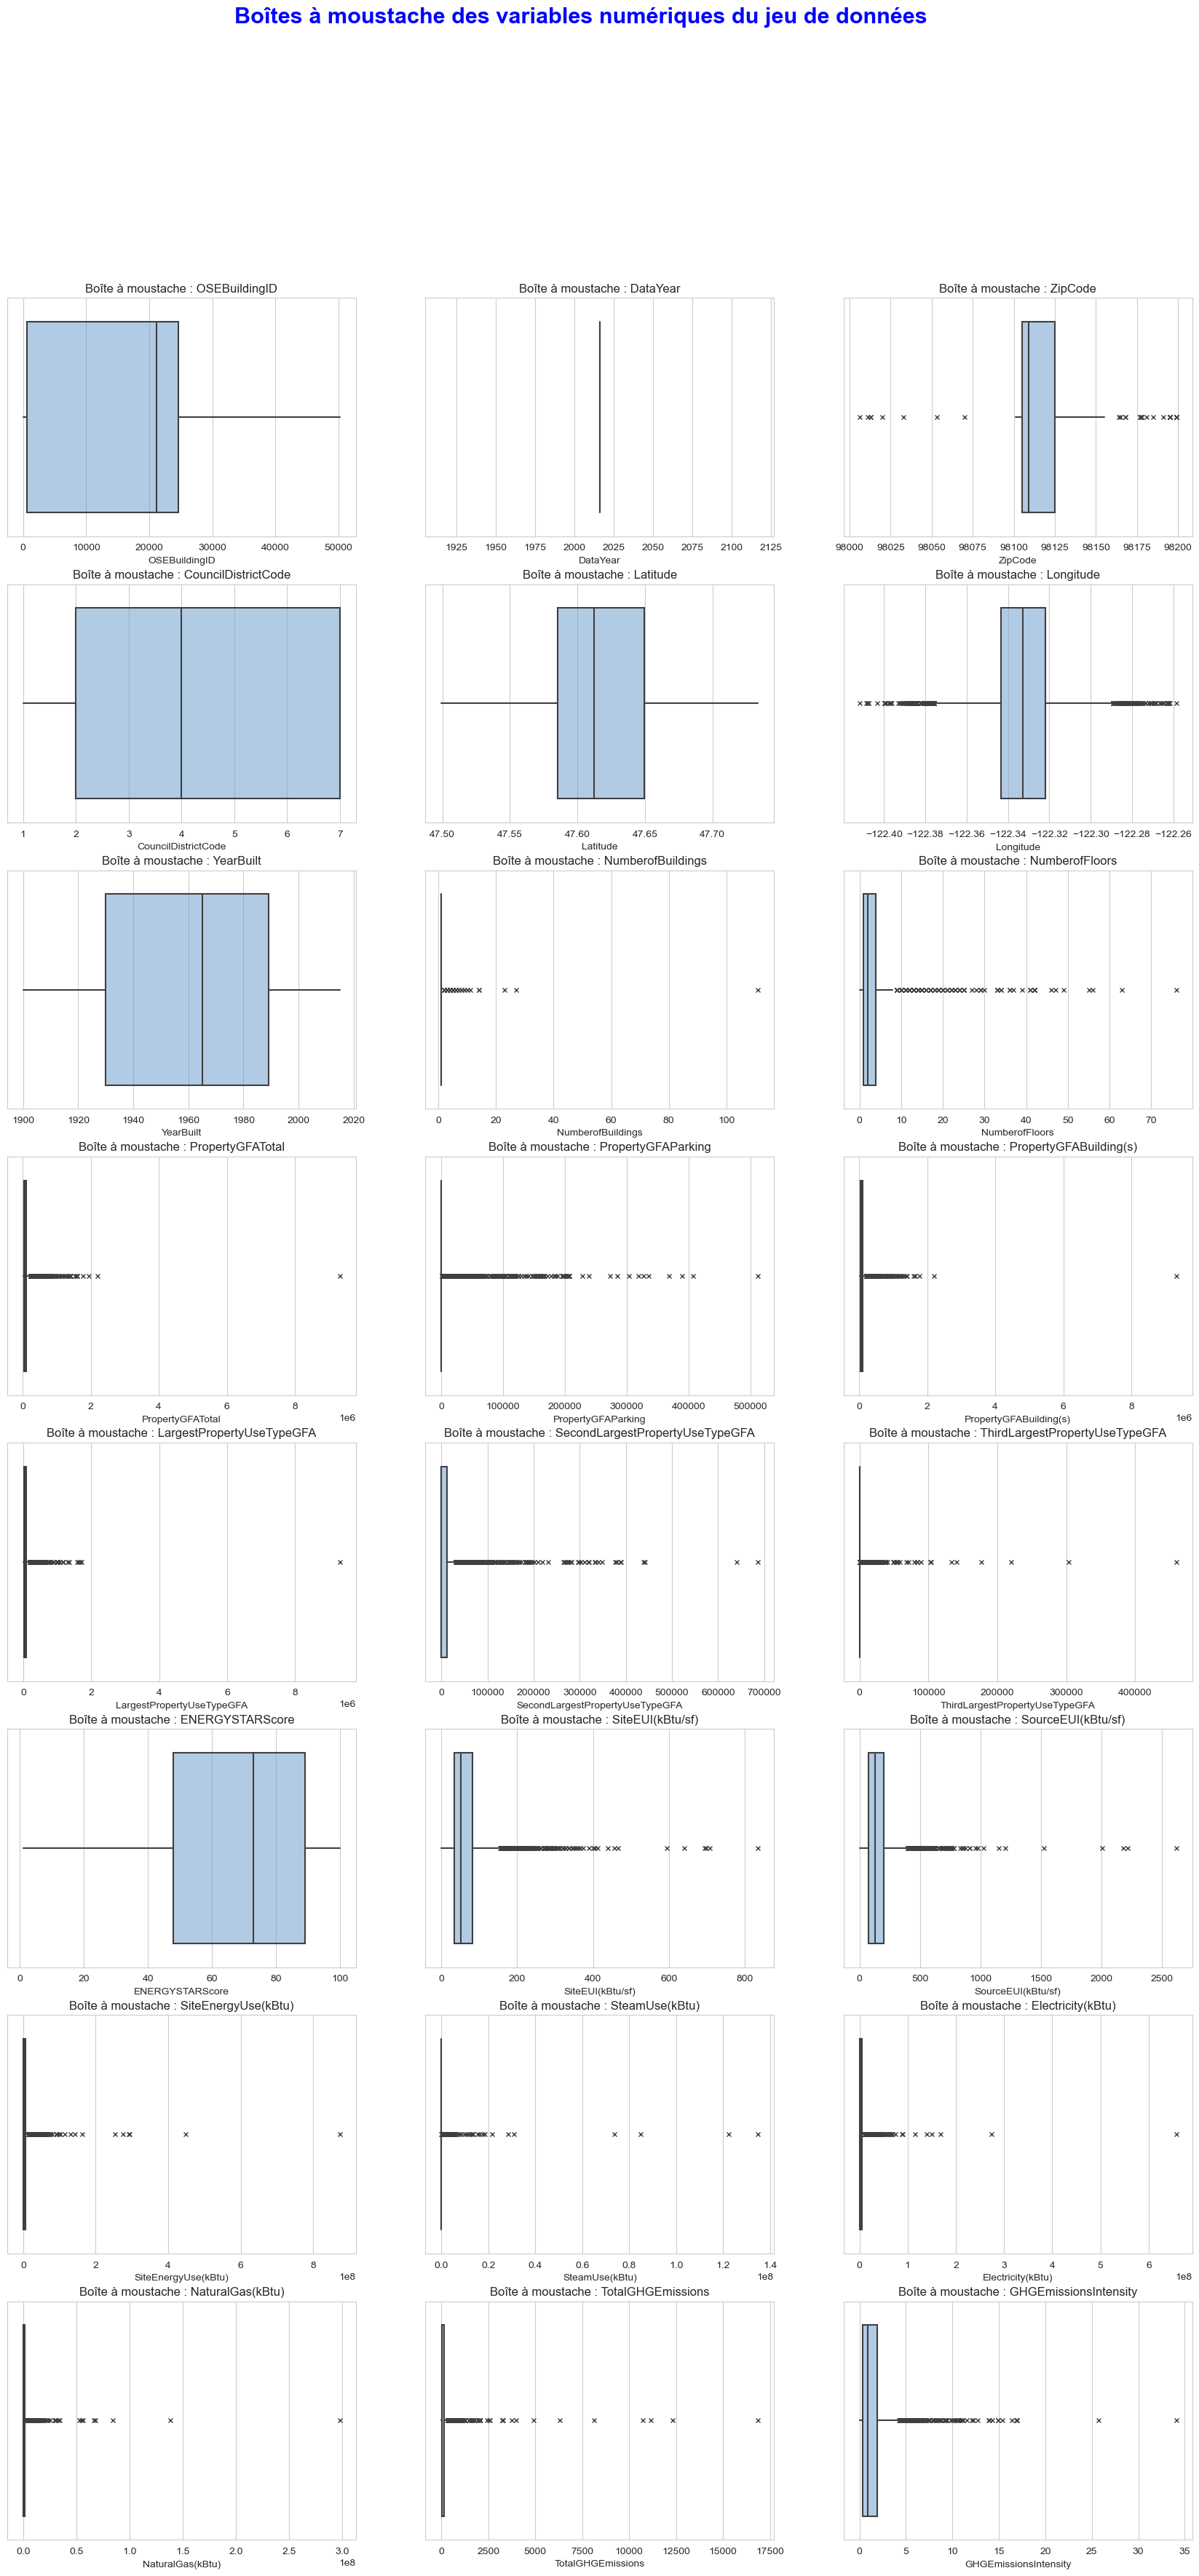

In [38]:
sns.set_style("whitegrid")
fig = plt.figure(figsize=(21,40))

sub = 0
for i in range(len(variable_quantitative)):
    fig.add_subplot(8,3,i+1)
    
    left, width = 0, 1
    bottom, height = 0, 1
    right = left + width
    top = bottom + height
    
    colonne = variable_quantitative[i]
    ax = sns.boxplot(data = building_data, x = colonne,
                    showcaps=False,flierprops={"marker": "x"},
                     boxprops={"facecolor": (.4, .6, .8, .5)})
    ax.set_title("Boîte à moustache : {}".format(colonne))
    plt.suptitle("Boîtes à moustache des variables numériques du jeu de données", fontsize = 22, 
                 fontweight = "bold", color = "blue" )
plt.show()

L'observation des boîtes à moustache ne révèlent aucune autre valeur aberrante sur l'ensemble des variables. Cependant, la présence de nombreux outliers conditionnera plus tard (lors de la modélisation) la méthode de standardisation à utiliser.

In [39]:
building_data.shape

(1662, 38)

<AxesSubplot:>

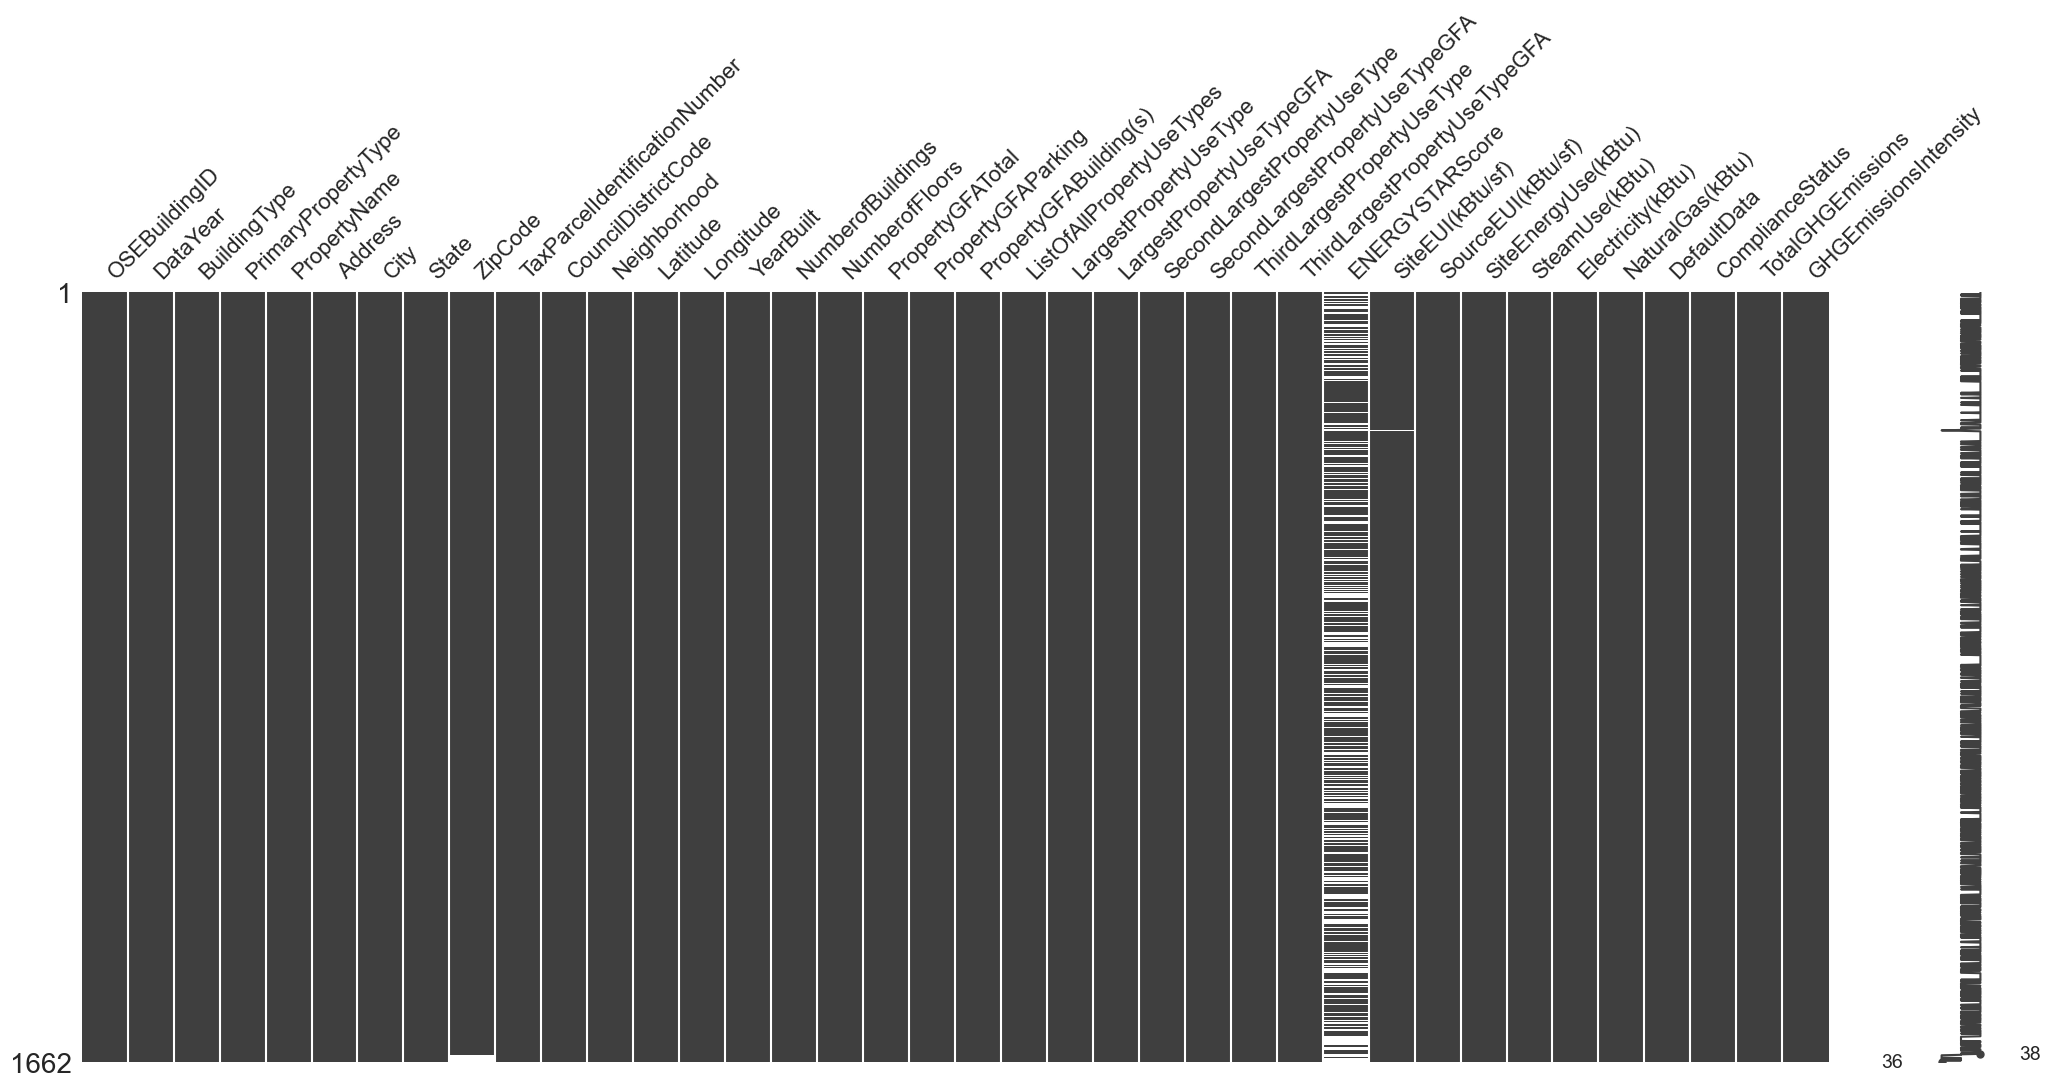

In [40]:
# Visualisation rapide de la matrix des données
msno.matrix(building_data)

Le jeu de données contient peu de valeurs manquantes. Seules les variables dont on ne peut réaliser d'imputation contiennent plusieurs valeurs manquantes. En l'état, on peut procéder à l'analyse.

# 3. Analyse des données

## 3.1. Analyse univariée de quelques variables
Dans cette section, je vais procéder à l'analyse des variables cibles ainsi qu'à l'analyse des variables pouvant influer sur ces variables cibles.

### 3.1.1. Analyse des bâtiments 
#### a) Repartition des bâtiments
Observons la répartition des types de bâtiments à l'aide du diagramme en secteur

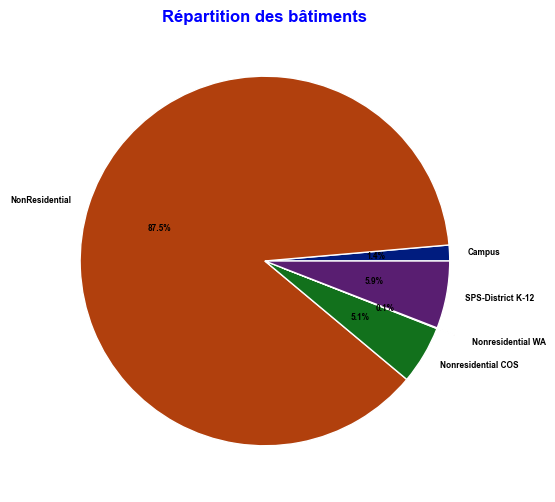

In [41]:
# Palette de couleur à utiliser
palette_color = sns.color_palette('dark')

# Données à afficher
types_batiment = building_data.groupby(by = "BuildingType")["OSEBuildingID"].nunique()

# Tracer des données sur le graphique
explode = (0, 0, 0, 0.1, 0)
plt.figure(figsize = (6,6))
plt.title("Répartition des bâtiments", fontsize = 12, fontweight = "bold", color = "blue")
plt.pie(types_batiment.values, labels=types_batiment.index, colors=palette_color, autopct='%1.1f%%', explode = explode,
       textprops=dict(color="black",size=6, weight="bold"))
  
# Affichage du diagramme
plt.show()

Les bâtiments typés "NonResidential" sont les plus représentés avec une proportion de plus de 87%. <br>
Regardons à quel usage sont réservés ces bâtiments

In [42]:
building_data.loc[(building_data["BuildingType"]=="NonResidential"),'PrimaryPropertyType'].value_counts()

Small- and Mid-Sized Office    286
Other                          185
Warehouse                      180
Large Office                   168
Mixed Use Property             101
Retail Store                    91
Hotel                           76
Worship Facility                71
Distribution Center             51
Supermarket / Grocery Store     40
K-12 School                     39
Medical Office                  38
Self-Storage Facility           28
Residence Hall                  21
Senior Care Community           20
University                      17
Refrigerated Warehouse          12
Restaurant                      11
Hospital                        10
Laboratory                      10
Name: PrimaryPropertyType, dtype: int64

La majorité des bâtiments non résidentiels sont utilisé comme des bureaux, de petite et moyenne taille. 

#### b) Ages des bâtiments

**_Années de contruction des bâtiments_**

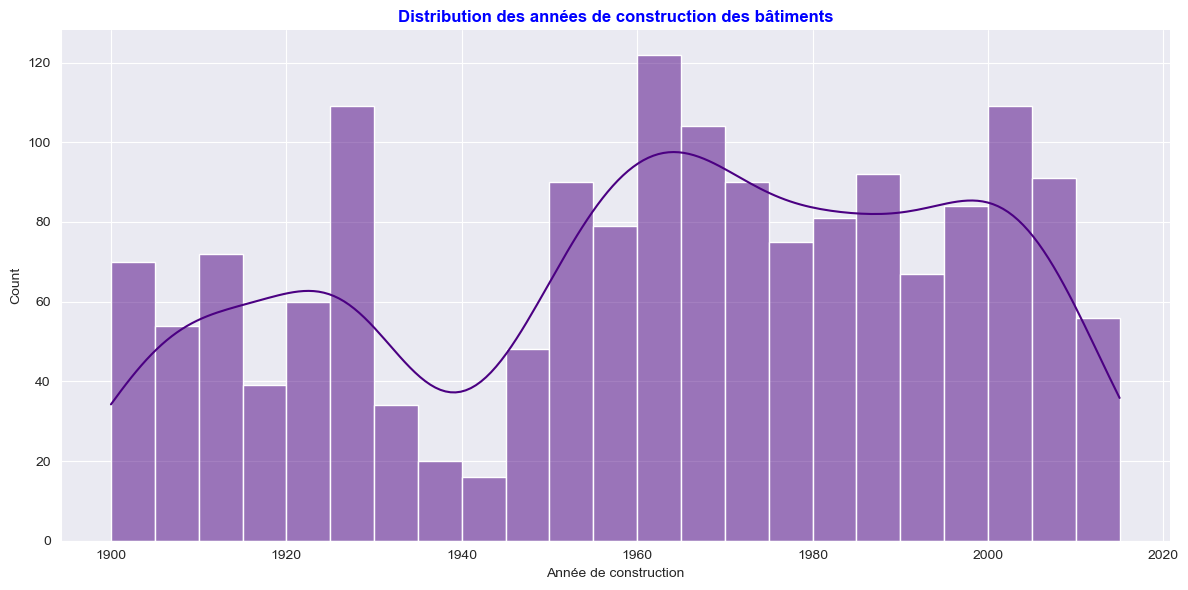

In [43]:
# Observation de la distribution des valeurs
plt.figure(figsize=(12,6))
sns.set_style("darkgrid")
sns.histplot(data=building_data, x = "YearBuilt", bins=30, binwidth=5, kde = True, color = "indigo")
plt.title("Distribution des années de construction des bâtiments", fontsize = 12, fontweight = "bold", color = "blue")
sns.despine()
plt.xlabel("Année de construction")
plt.tight_layout();
plt.show()

Les valeurs sont fortement dispersées. A partir de 1950, on peut noter une augmentation du nombre de construction en comparaison aux années antérieure. <br> Je vais créer une nouvelle variable relatives à l'âge des bâtiments ("BuildingAge"). Cette variable permettra, lors de l'analyse bivariée d'étudier l'impact de l'âge d'un bâtiment sur sa consommation d'énergie et ses émissions de gaz.

In [44]:
# Création de la variable "BuildingAge"
building_data["BuildingAge"] = building_data["DataYear"] - building_data["YearBuilt"]

# suppression de la variable "YearBuilt" pour conserver uniquement la nouvelle variable "BuildingAge"
building_data.drop("YearBuilt", axis = 1, inplace = True) 

### 3.1.2. Le score de performance énergétique
Le score ENERGY STAR évalue la performance énergétique globale d'une propriété, sur la base de données nationales pour contrôler les différences entre le climat, les utilisations des bâtiments et les opérations. <br> Il est exprimé sur une échelle de 1 à 100 facile à comprendre : plus le score est élevé, meilleure est la performance énergétique du bâtiment. La médiane nationale est 50. Pour un bâtiment, une note supérieur à 50 est considéré comme une bonne note.

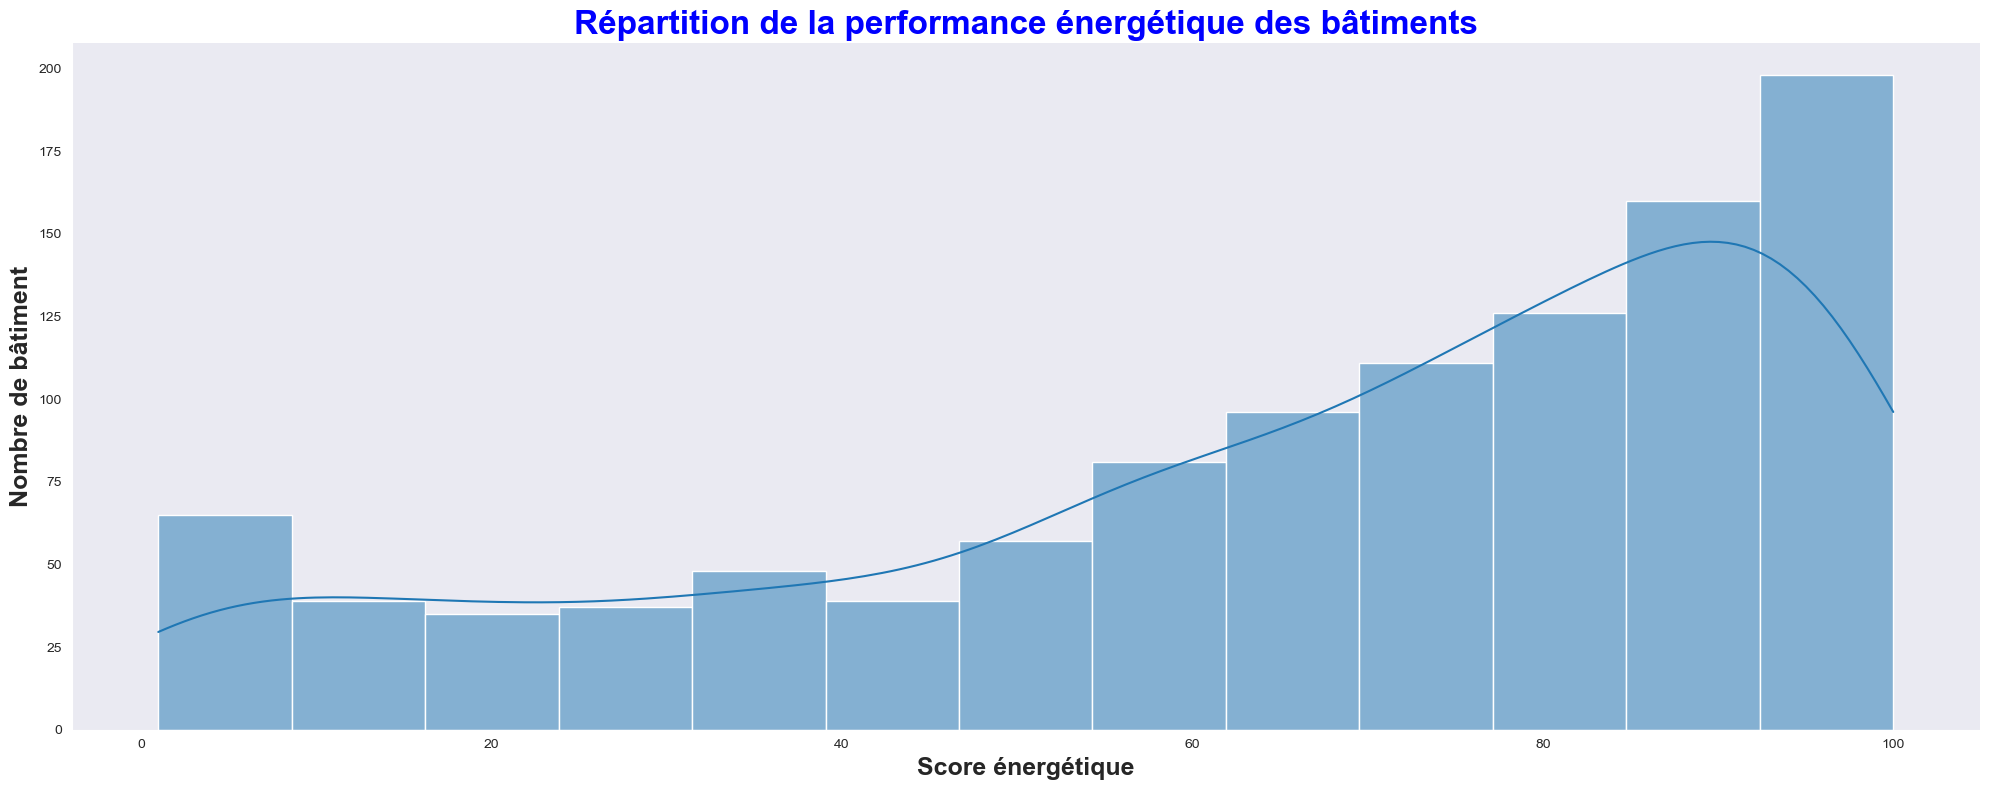

In [45]:
# Observation graphique de la répartition du score énergétique
plt.figure(figsize = (20, 8))
sns.histplot(data = building_data, x = "ENERGYSTARScore", kde = True)
plt.title("Répartition de la performance énergétique des bâtiments", fontsize = 24, fontweight = "bold", color = "blue")
sns.despine()
plt.xlabel("Score énergétique", fontsize = 18, fontweight = "bold")
plt.ylabel("Nombre de bâtiment", fontsize = 18, fontweight = "bold")
plt.grid(axis = "both")
plt.tight_layout();
plt.show()

La distribution ne suit pas de loi normale et la majorité des batiments a un score supérieur à 50 (de bonne qualité voir de très bonne qualité). <br> Combien de bâtiments ont exactement une note supérieure à la médiane nationale (50) ?

In [46]:
nombre = building_data["ENERGYSTARScore"] > 50
pourcentage = (nombre.sum()/building_data.shape[0]) * 100
print("A Seattle,", nombre.sum(), "bâtiments non résidentiels ont une note supérieure à la médiane nationale, soit", pourcentage.round(2), "%.")

A Seattle, 802 bâtiments non résidentiels ont une note supérieure à la médiane nationale, soit 48.26 %.


Combien de bâtiments ont la note optimale ?

In [47]:
nombre_2= building_data["ENERGYSTARScore"] == 90
pourcentage_2 = (nombre_2.sum()/building_data.shape[0]) * 100
print("A Seattle,", nombre_2.sum(), "bâtiments non résidentiels ont un score énergétique optimal, soit", pourcentage_2.round(2), "%.")

A Seattle, 17 bâtiments non résidentiels ont un score énergétique optimal, soit 1.02 %.


### 3.1.3. État de conformité
Recherche des bâtiments ayant satisfait aux exigences d'analyse comparative énergétique.

In [48]:
building_data["ComplianceStatus"].unique()

array(['Compliant', 'Error - Correct Default Data', 'Missing Data',
       'Non-Compliant'], dtype=object)

In [49]:
# Nombre de bâtiments ayant satisfait aux exigences de conformités
nombre_satisfaisant = building_data[building_data["ComplianceStatus"] == "Compliant"].shape[0]
pourcentage_satisfaisant = round((nombre_satisfaisant/building_data.shape[0]) * 100)
print(pourcentage_satisfaisant, "% des bâtiments non résidentiels à Seattle satisfont les critères d'exigences.")

93 % des bâtiments non résidentiels à Seattle satisfont les critères d'exigences.


**_Suppression du jeu de données les valeurs non conformes aux exigences de conformités._**

In [50]:
building_data = building_data[building_data["ComplianceStatus"] == "Compliant"]

### 3.1.4. Analyse des variables à prédire
Les 2 variables à prédire dans le cadre de ce travail sont "TotalGHGEmissions" et "SiteEnergyUse(kBtu)"

In [51]:
# Aperçu des valeurs de ces variables
building_data[["TotalGHGEmissions", "SiteEnergyUse(kBtu)"]].sample(5)

,TotalGHGEmissions,SiteEnergyUse(kBtu)
375,17.17,1429146.375
485,67.29,2409429.000
1692,96.15,3091387.500
332,40.47,5671256.000
344,74.10,2755829.000


#### a) Analyse de la consommation énergetique annuelle  
Analyse de la distribution des valeurs et de la normalité avec le test de Kolmogorov-Smirnov

In [52]:
# Importation de la librairie nécessaire pour le test
import scipy.stats as stats

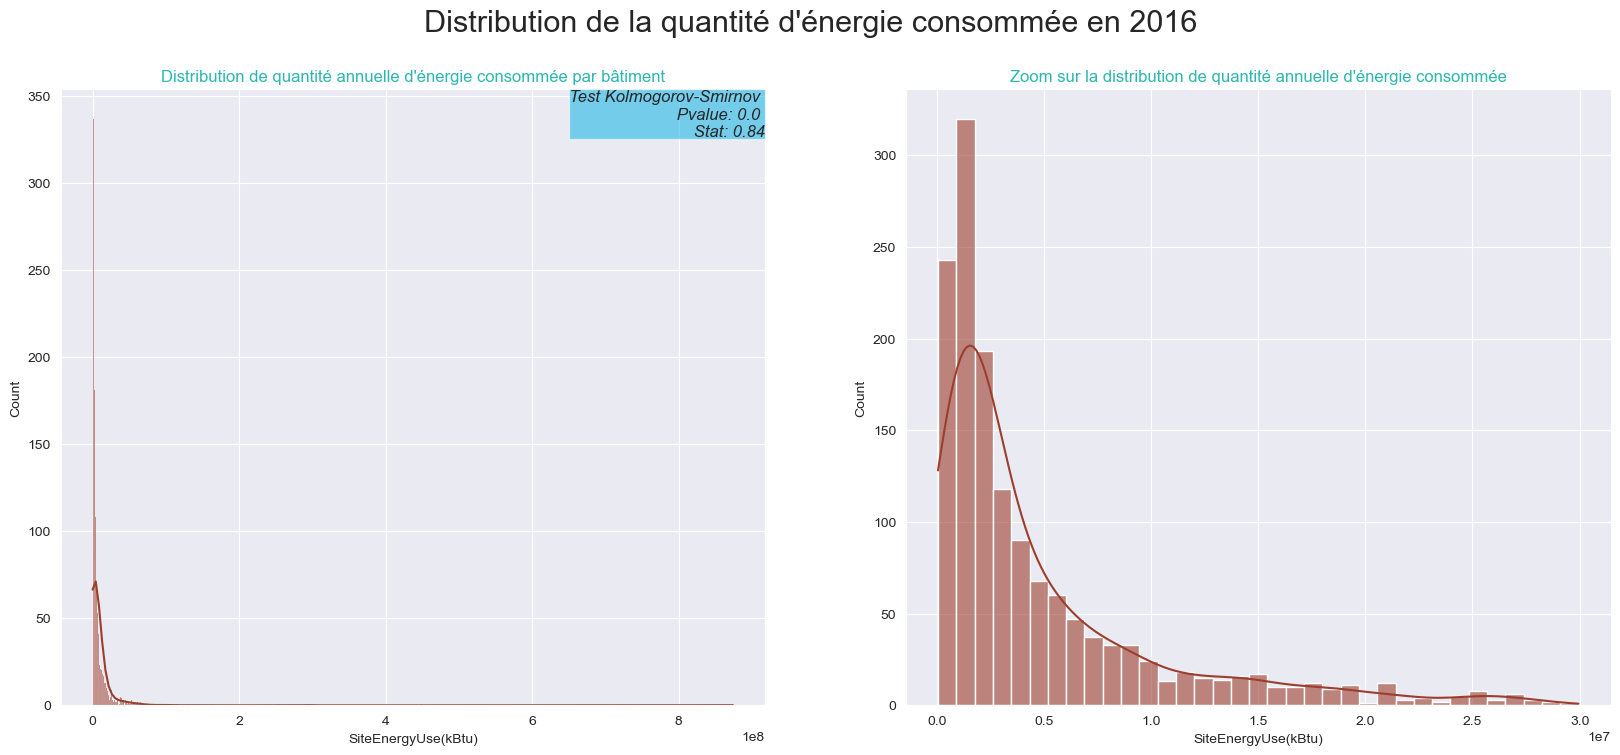

In [53]:
# Configuration de l'affichage de la figure
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

# Tracé de la figure
sns.histplot(data=building_data, x="SiteEnergyUse(kBtu)", kde=True, ax=axes[0], color="#9C3E2D", alpha=0.6)
axes[0].set_title("Distribution de quantité annuelle d'énergie consommée par bâtiment", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(building_data['SiteEnergyUse(kBtu)'].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

# Zoom sur l'histogramme pour un meilleur aperçu
sns.histplot(data=building_data[(building_data['SiteEnergyUse(kBtu)']< 3*10**7)], x="SiteEnergyUse(kBtu)",
             kde=True, ax=axes[1], color="#9C3E2D", alpha=0.6)

axes[1].set_title("Zoom sur la distribution de quantité annuelle d'énergie consommée", color='#2cb7b0')

plt.suptitle("Distribution de la quantité d'énergie consommée en 2016", fontsize=22)
plt.show()

Avec une P-value du test de Kolmogorov-Smirnov = à 0 (<0,05), l'hypothèse de normalité de la distribution est rejetée.

#### b) Analyse de l'émission annuelle  de gaz à effet de serre
Analyse de la distribution des valeurs et de la normalité avec le test de Kolmogorov-Smirnov

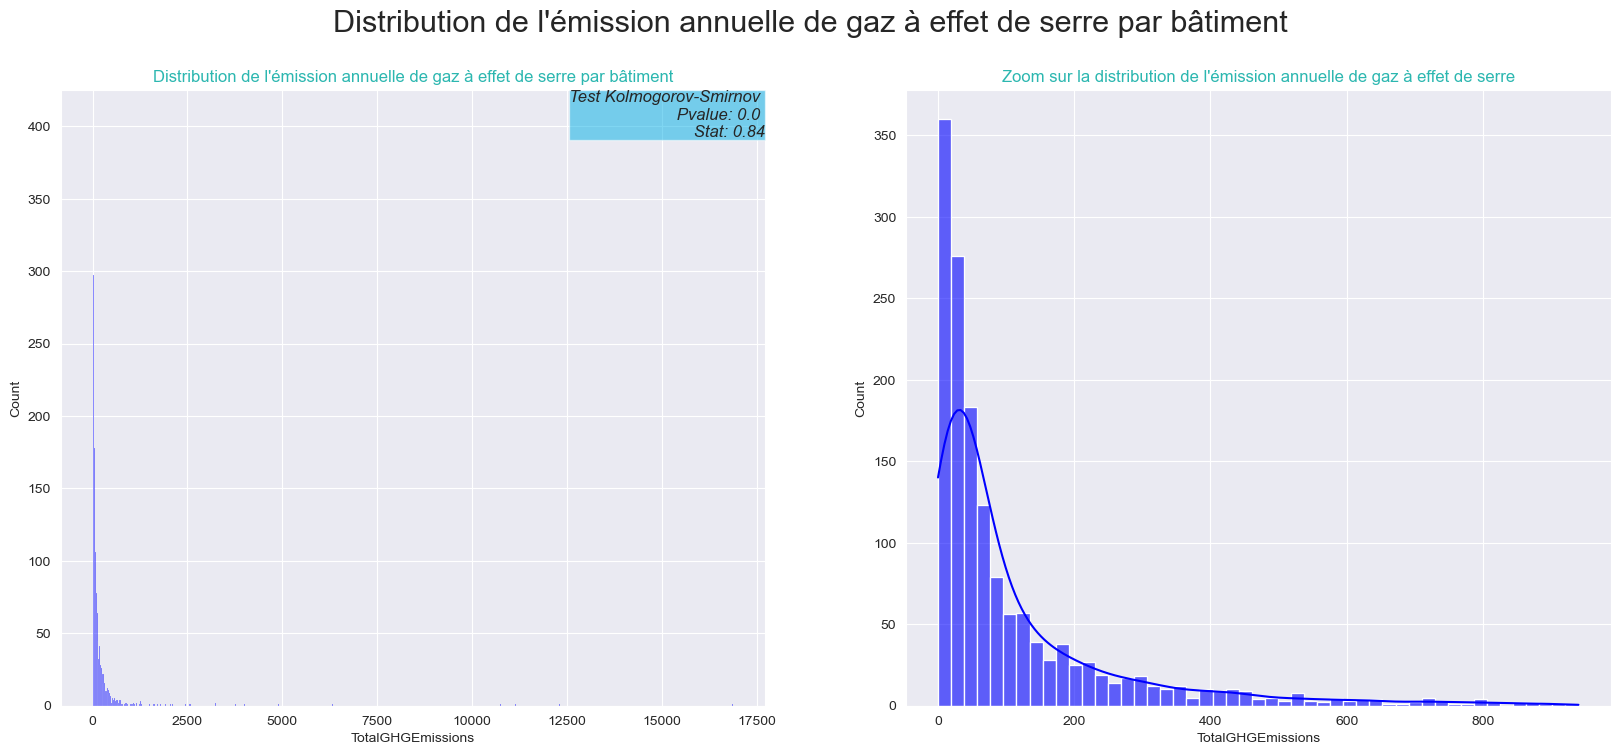

In [54]:
# Configuration de l'affichage
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))
left, width = 0, 1
bottom, height = 0, 1
right = left + width
top = bottom + height

# Tracé de l'histogramme
sns.histplot(data = building_data, x = "TotalGHGEmissions", ax = axes[0], color = "blue", alpha = 0.5)
axes[0].set_title("Distribution de l'émission annuelle de gaz à effet de serre par bâtiment", color='#2cb7b0')

#Test de Kolmogorov-Smirnov
kstest = stats.kstest(building_data["TotalGHGEmissions"].notnull(),'norm')
axes[0].text(right, top, 'Test Kolmogorov-Smirnov \n Pvalue: {:.2} \n Stat: {:.2}'.format(kstest.pvalue, kstest.statistic),
            horizontalalignment='right',
            verticalalignment='top',
            style='italic', transform=axes[0].transAxes, fontsize = 12,
            bbox={'facecolor':'#00afe6', 'alpha':0.5, 'pad':0})

# Zoom sur l'histogramme pour un meilleur aperçu
sns.histplot(data=building_data[(building_data["TotalGHGEmissions"]< 1000)], x="TotalGHGEmissions",
             kde=True, ax=axes[1], color="blue", alpha=0.6)

axes[1].set_title("Zoom sur la distribution de l'émission annuelle de gaz à effet de serre", color='#2cb7b0')

plt.suptitle("Distribution de l'émission annuelle de gaz à effet de serre par bâtiment", fontsize=22)
plt.show()

Avec une P-value du test de Kolmogorov-Smirnov = à 0 (<0,05), l'hypothèse de normalité de la distribution est rejetée.

**_Remarque : _**
Les variables cibles ne suivant une distribution normale, on devra les transformer afin de les rapprocher le plus près possible de la distribution normale, sans altérée la qualité des données. Cette transformation sera faite lors du feature engineering. <br> Pour l'instant je poursuis avec les analyses multivariées.

## 3.2. Analyses multivariées
Commençons par rechercher l'existence de corrélations entre les variables à l'aide de la carte thermique

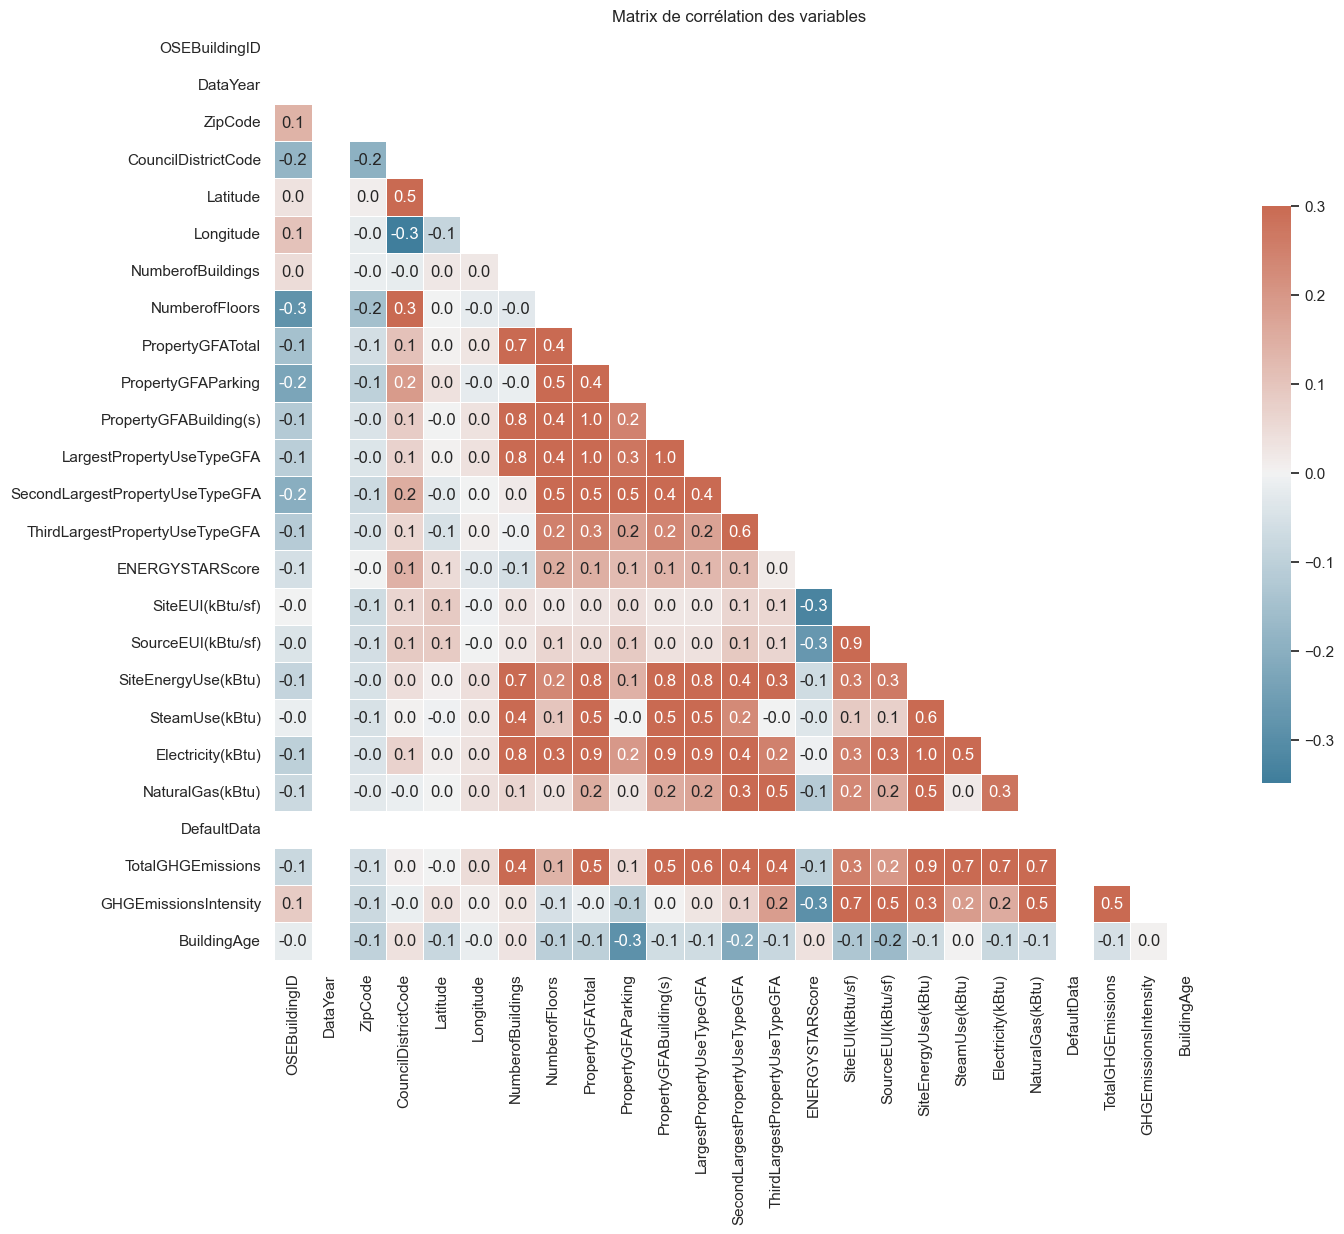

In [55]:
# Définition du style
sns.set_theme(style="white")

# Calcule de la matrice de corrélation
corr = building_data.corr()

# Généreration d'un masque pour le triangle supérieur
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuration du tracé
f, ax = plt.subplots(figsize=(15, 15))

# Generation d'une palette de couleur
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, annot= True, fmt=".1f", vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.title("Matrix de corrélation des variables")
plt.show()

**_Observations :_**
Cette matrix de corrélation fait resortir deux principales informations : 
* Plusieurs variables présentent de fortes corrélations linéaires. Ces corrélations peuvent avoir un impact négatif sur les modèles de prédictions. Ceci sera à corriger ;
* Les varaibles à prédire TotalGHGEmissions et SiteEnergyUse(kBtu), ont des corrélations linéaires quasi similaires avec les variables de relevés (les consommations) mais également avec le nombre de batiments ou d'étages ains que les surfaces au sol ;
* Les variables cibles sont aussi fortement corrélées entre elles. etudions cela ci-dessous :

### 3.2.1. Etude la corrélation entre les variables cibles
Pour décrire la distribution conjointe des variables "TotalGHGEmissions" et "SiteEnergyUse(kBtu)", je vais procéder par la réprésentation du nuage des points.

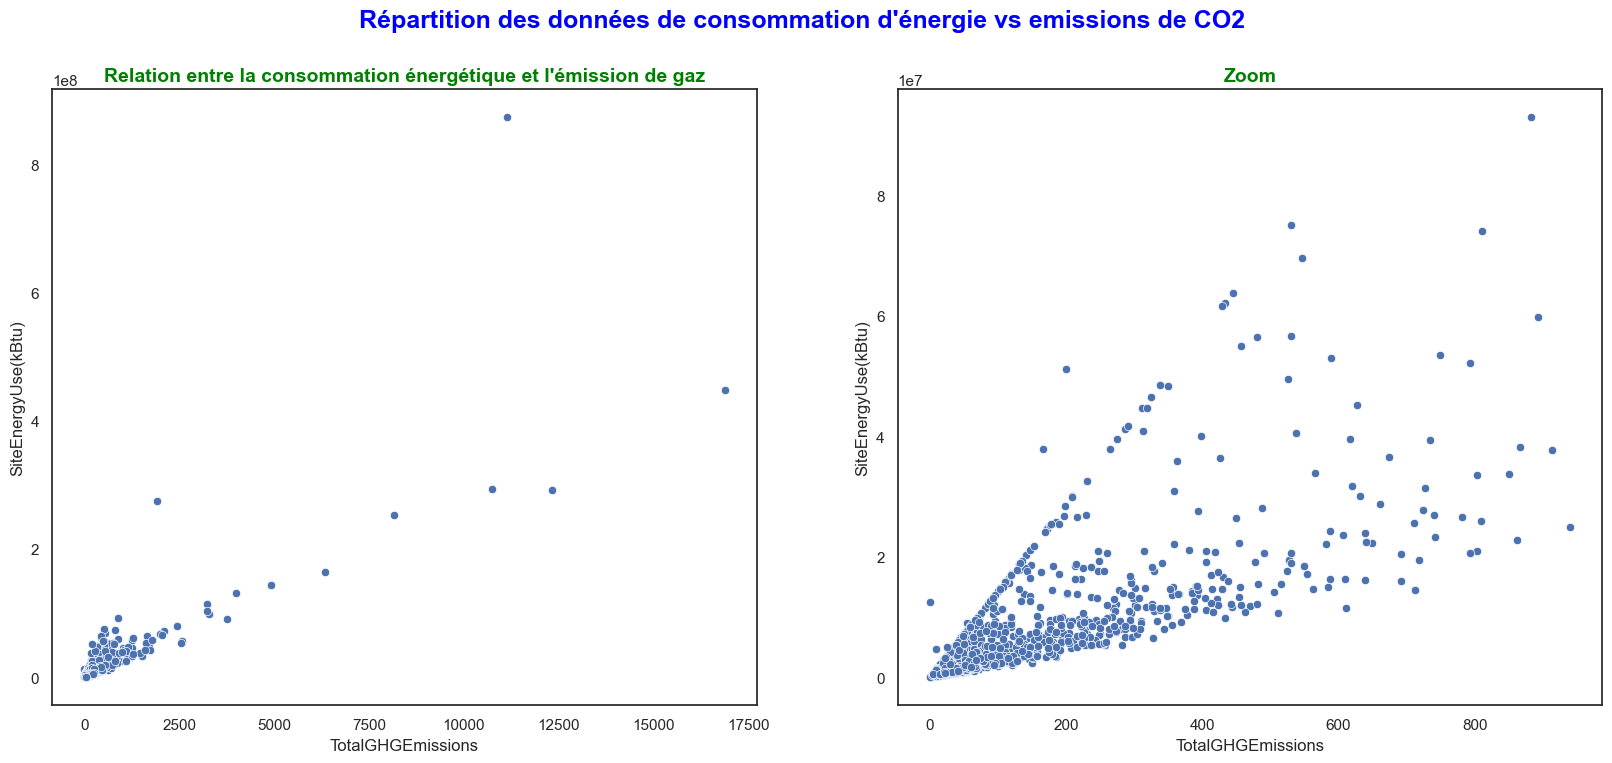

In [56]:
# Configuration de l'affichage
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 8))

# Tracé de l'histogramme
sns.scatterplot(data = building_data, x = "TotalGHGEmissions", y = "SiteEnergyUse(kBtu)", ax = axes[0])
axes[0].set_title("Relation entre la consommation énergétique et l'émission de gaz", color='green', fontweight = "bold",
                  fontsize = 14)

sns.scatterplot(data = building_data[(building_data["TotalGHGEmissions"] < 1000)], 
                x = "TotalGHGEmissions", y = "SiteEnergyUse(kBtu)", ax = axes[1])
axes[1].set_title("Zoom", color='green', fontsize = 14, fontweight = "bold")
plt.suptitle("Répartition des données de consommation d'énergie vs emissions de CO2", color = "blue", fontweight = "bold",
            fontsize = 18)
plt.show()

L'observation du zoom du nuage des points montre que les deux variables sont corrélés suivant plusieurs droite de régréssion linéaire.

### 3.2.2. Consommation énergétique et émission de gaz en fonction du type de bâtiment

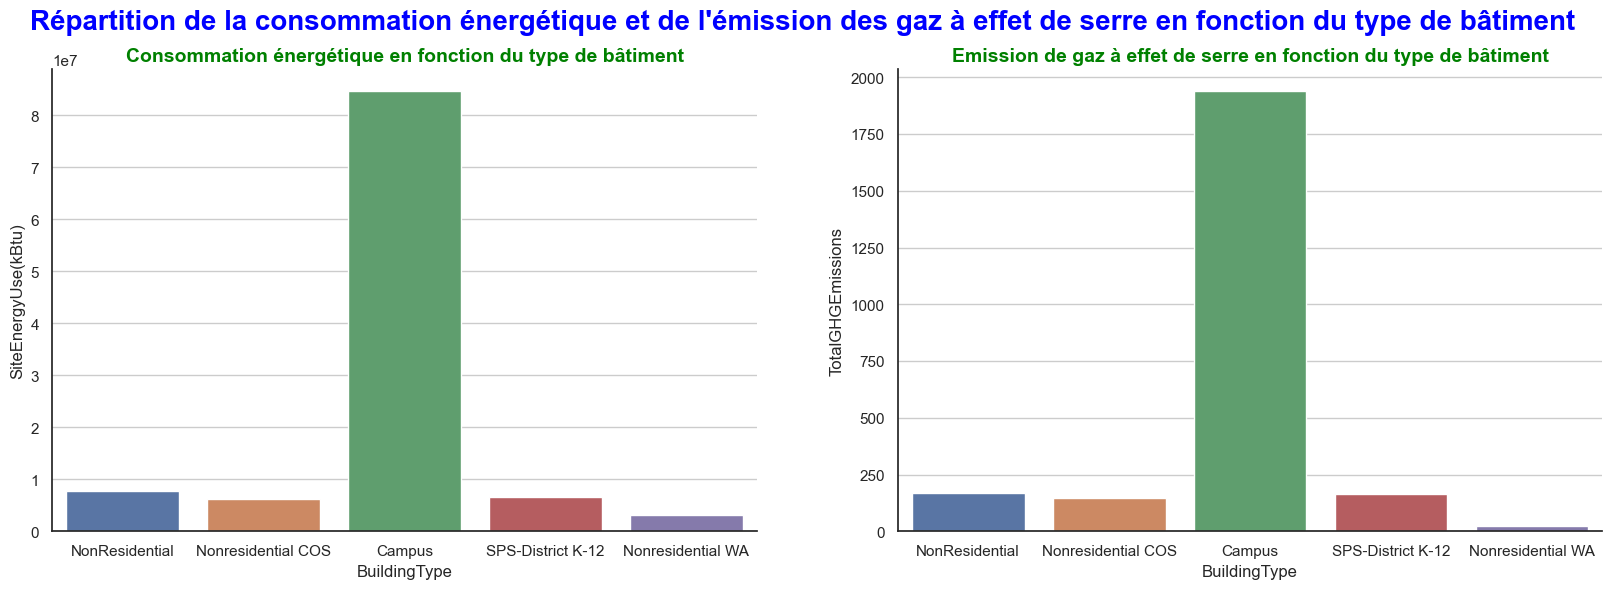

In [57]:
# Configuration de l'affichage
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 6))
axes[0].grid(True)
axes[1].grid(True)
sns.despine()

# Tracé de l'histogramme
sns.barplot(data = building_data, x = "BuildingType", y = "SiteEnergyUse(kBtu)", ax = axes[0], ci=None)
axes[0].set_title("Consommation énergétique en fonction du type de bâtiment", color='green', fontsize = 14, fontweight = "bold")

sns.barplot(data = building_data, x = "BuildingType", y = "TotalGHGEmissions", ax = axes[1], ci=None)
axes[1].set_title("Emission de gaz à effet de serre en fonction du type de bâtiment", color='green', fontsize = 14, fontweight = "bold")
plt.suptitle("Répartition de la consommation énergétique et de l'émission des gaz à effet de serre en fonction du type de bâtiment",
             color = "blue", fontweight = "bold",
            fontsize = 20)
plt.show()

Les campus sont de loin les bâtiments les plus gourmandes en énergie et les plus émettrice de gaz à effet de serre. 

### 3.2.2. Consommation énergétique et émission de gaz en fonction de l'usage principal du bâtiment

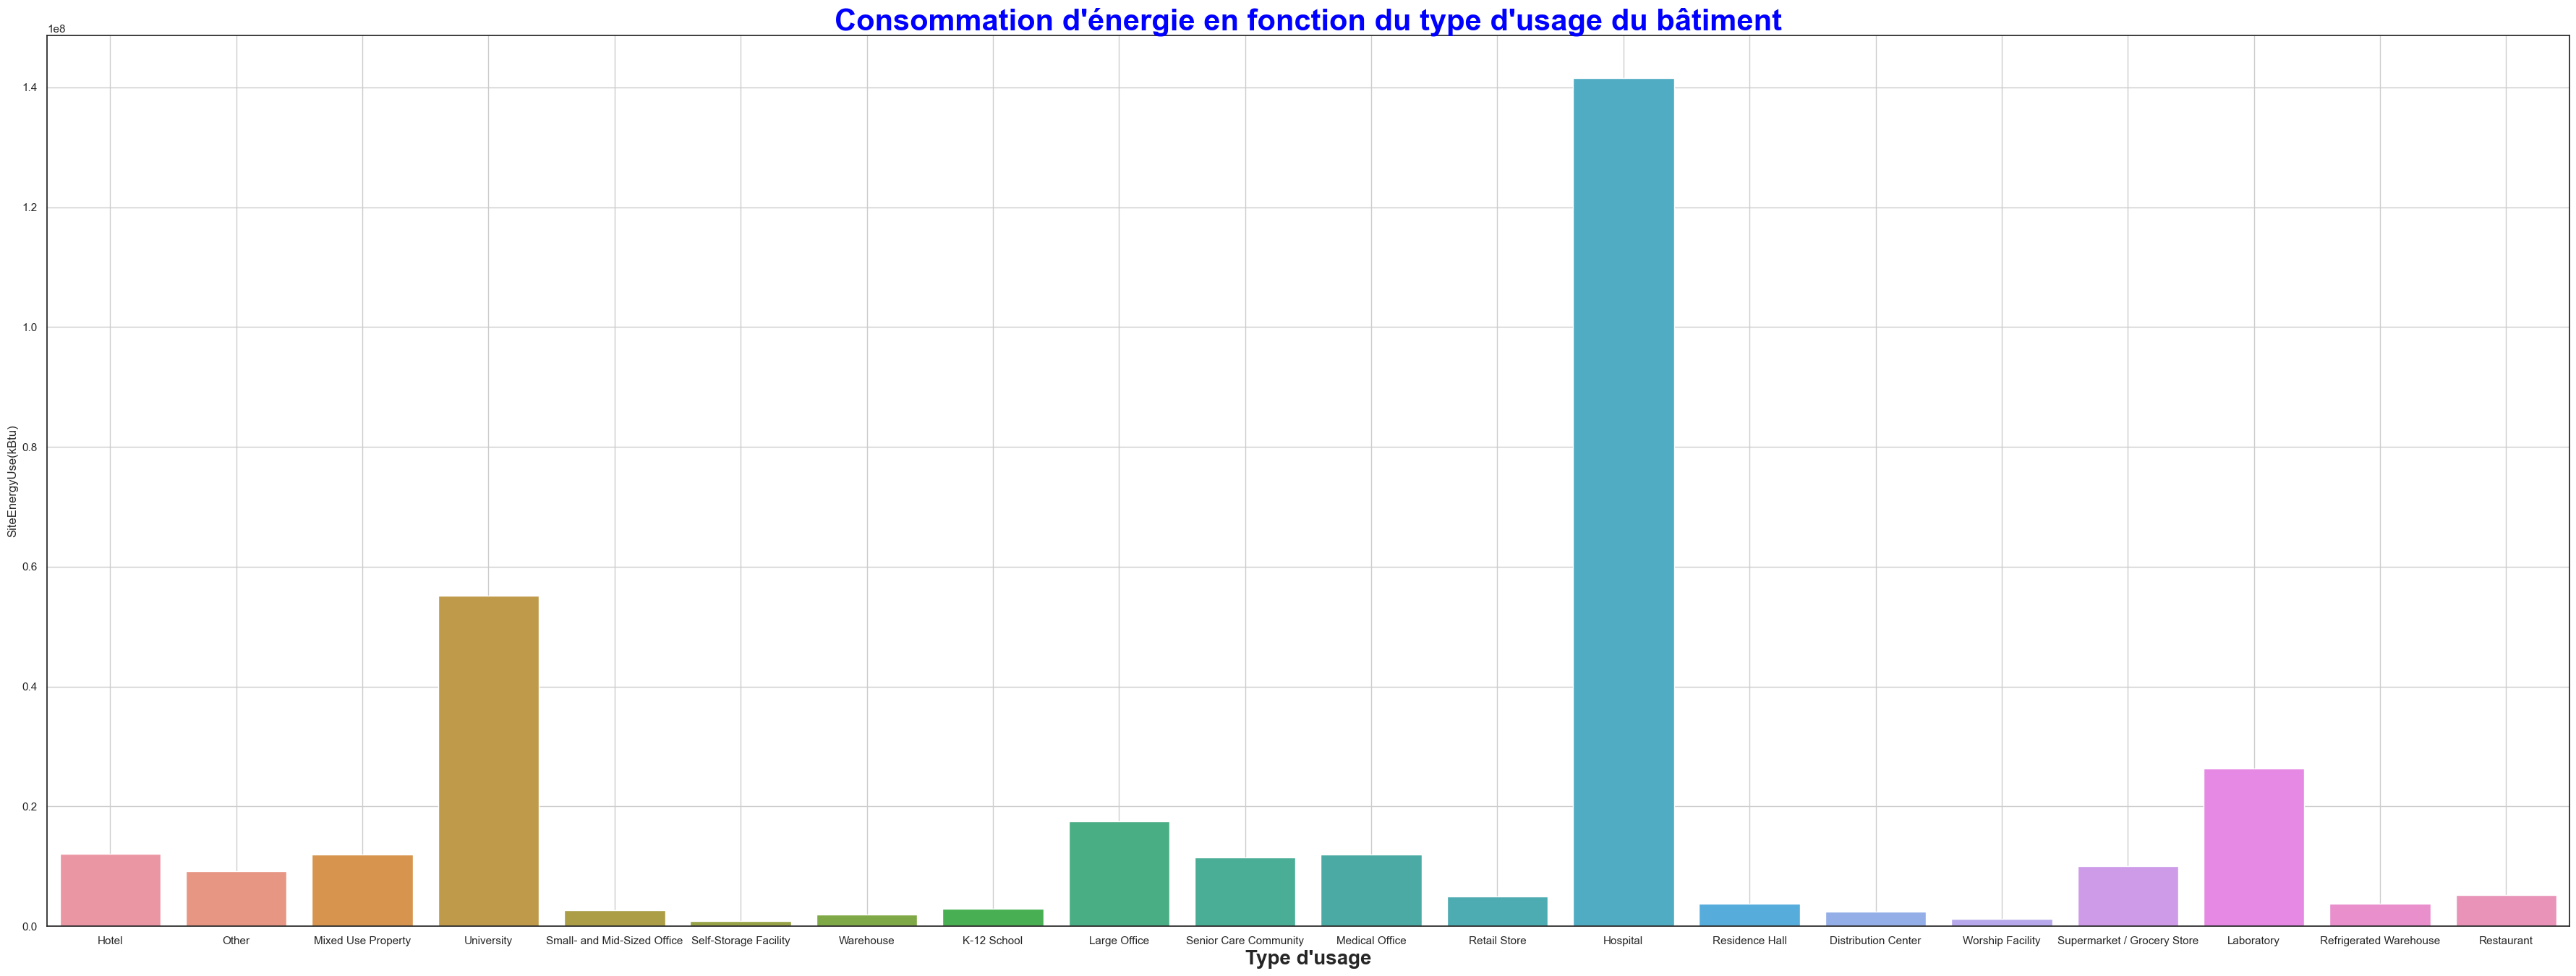

In [58]:
plt.figure(figsize = (45,16))
plt.title("Consommation d'énergie en fonction du type d'usage du bâtiment", fontsize = 30, fontweight = "bold", color = "blue")
sns.barplot(data=building_data, x = "PrimaryPropertyType", y = "SiteEnergyUse(kBtu)", ci = None)
plt.grid(axis = "both")
plt.xlabel("Type d'usage", fontsize = 20, fontweight = "bold")
plt.show()

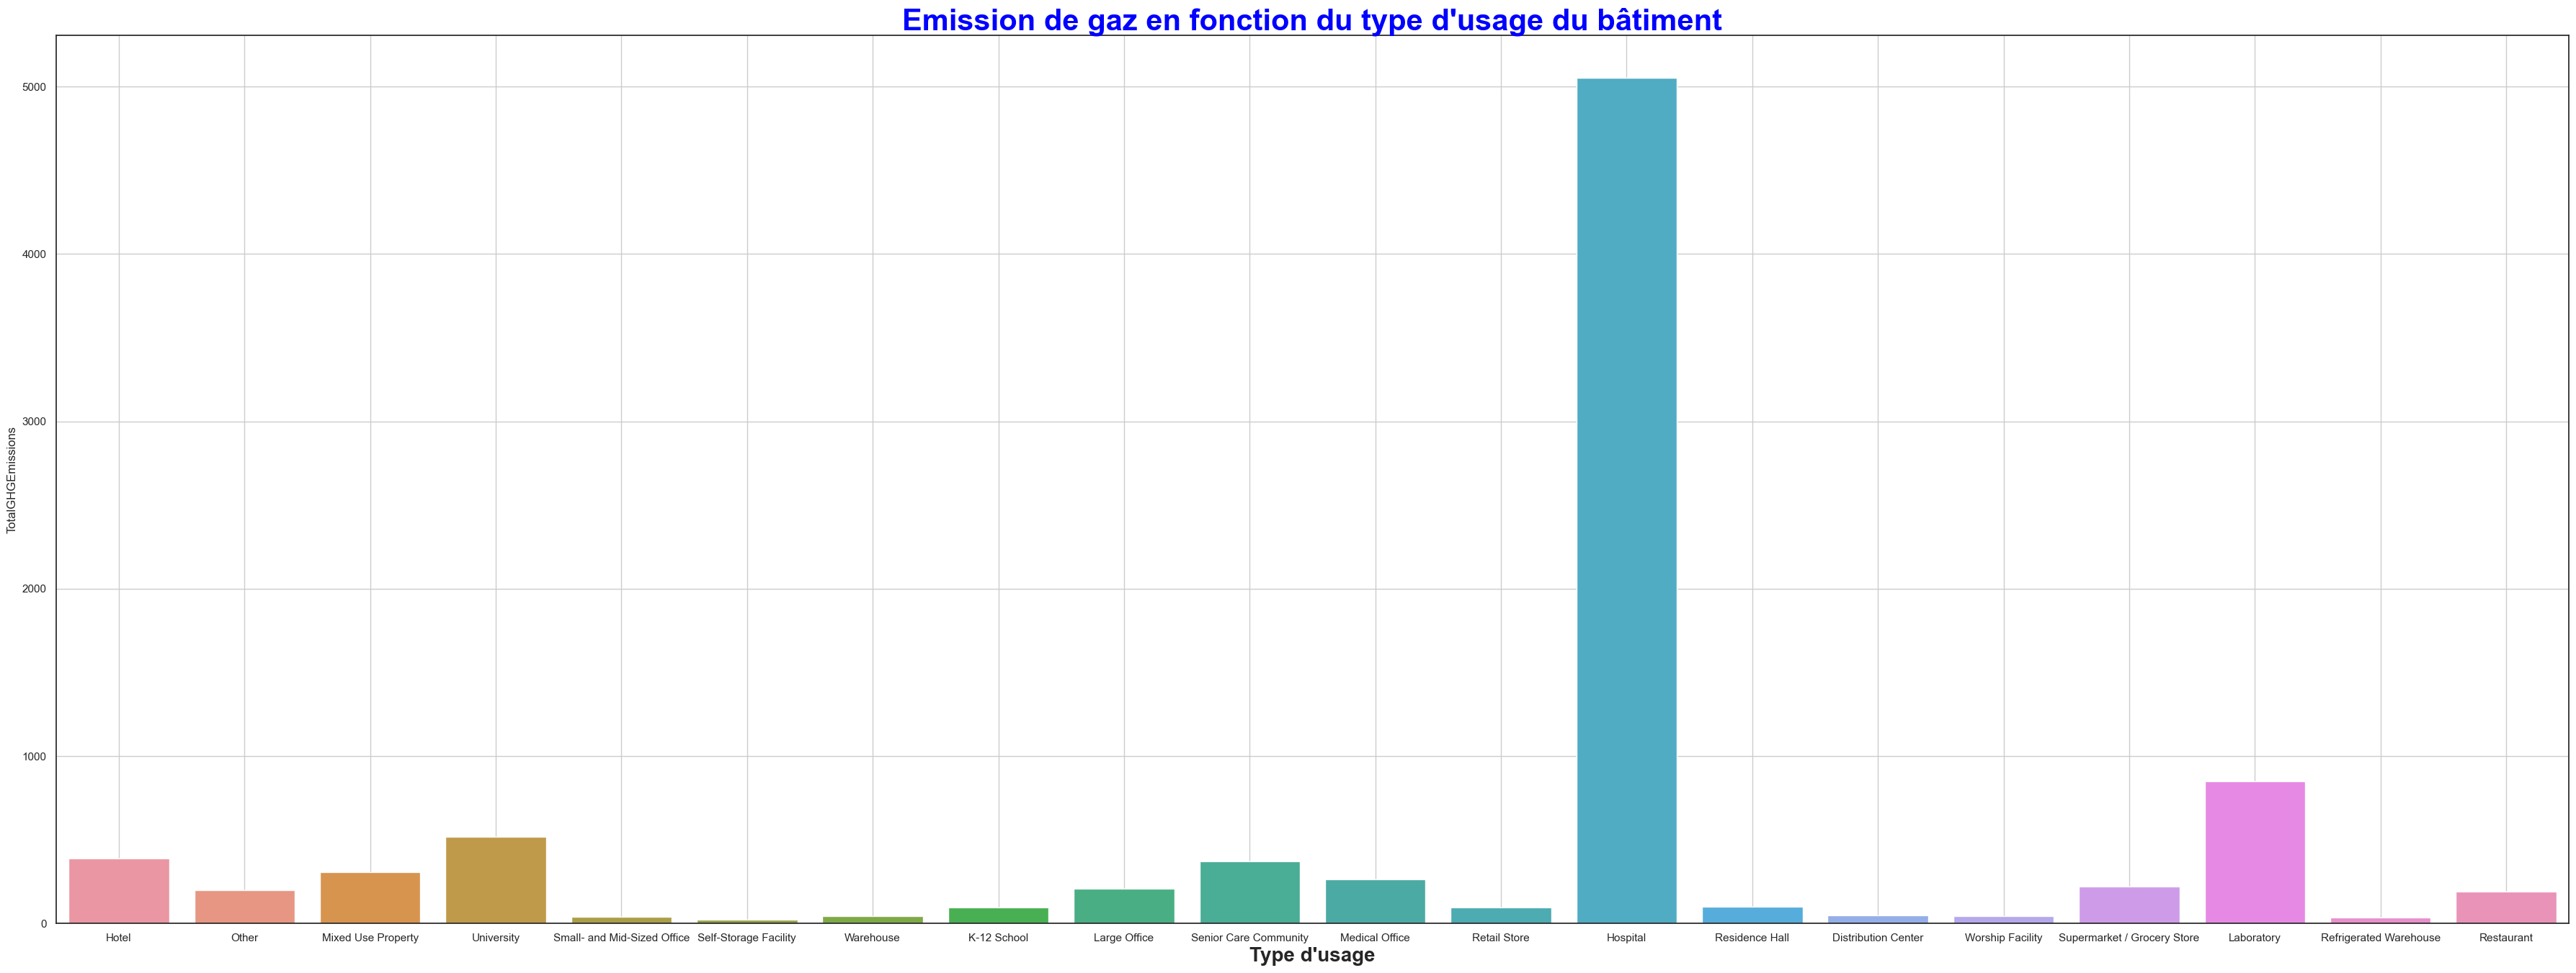

In [82]:
plt.figure(figsize = (45,16))
plt.title("Emission de gaz en fonction du type d'usage du bâtiment", fontsize = 30, fontweight = "bold", color = "blue")
sns.barplot(data=building_data, x = "PrimaryPropertyType", y = "TotalGHGEmissions", ci = None)
plt.grid(axis = "both")
plt.xlabel("Type d'usage", fontsize = 20, fontweight = "bold")
plt.show()

Les bâtiments destinés aux hôpitaux sont les énergivores et plus polluantes suivi des universités et des laboratoires.

### 3.2.3. Consommation énergétique et émission de gaz en fonction de l'âge des bâtiments
On s'attendrait ici à ce que les bâtiments les plus anciens soit les plus consommatrices d'énergie et les plus émettrice de gaz.

In [60]:
# Regroupement des âges en classe
building_data['Age'] = pd.cut(building_data['BuildingAge'], 
    bins=[x for x in range(0,130, 10)], 
    right=True)

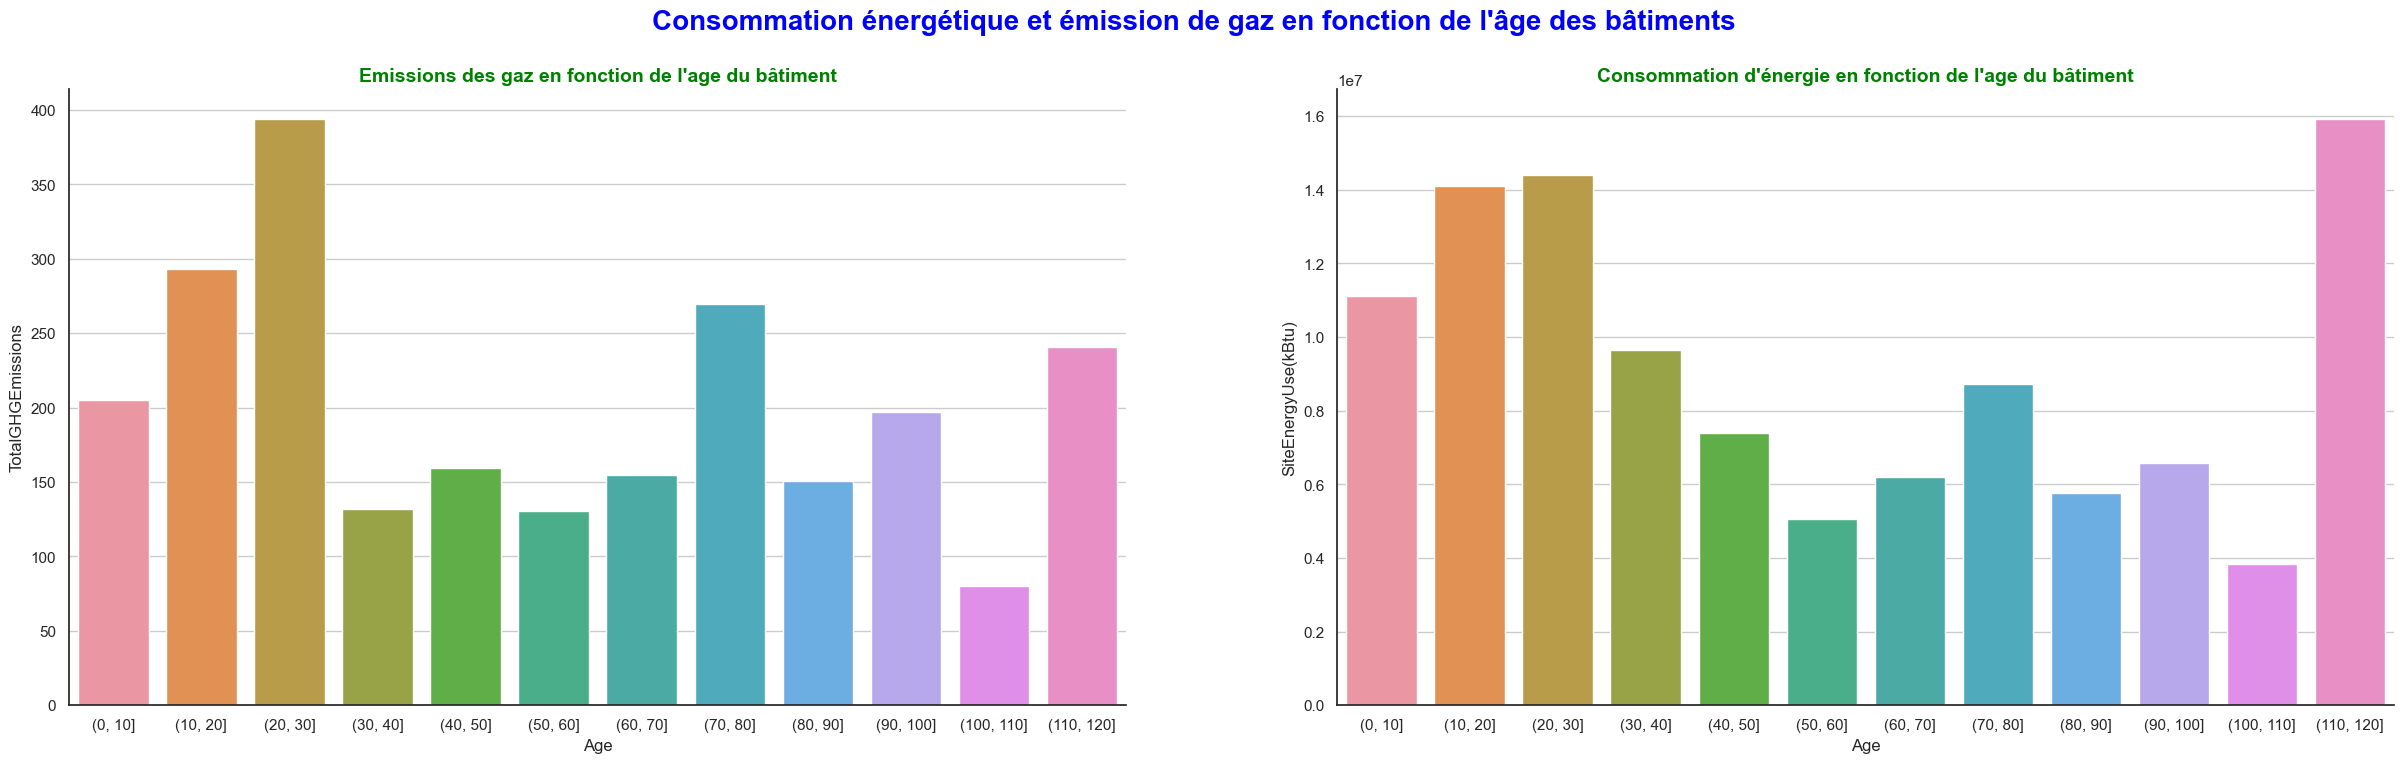

<Figure size 1500x800 with 0 Axes>

In [61]:
# Configuration de l'affichage
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (30, 8))
axes[0].grid(True)
axes[1].grid(True)
sns.despine()

# Tracer de l'histogramme
plt.suptitle("Consommation énergétique et émission de gaz en fonction de l'âge des bâtiments",
            color = "blue", fontweight = "bold", fontsize = 20)

plt.figure(figsize=(15,8))
sns.barplot(x = "Age", y= "TotalGHGEmissions", data=building_data, ax = axes[0], ci=None)
axes[0].set_title("Emissions des gaz en fonction de l'age du bâtiment", fontsize=14, color = "green", fontweight = "bold")

sns.barplot(x = "Age", y= "SiteEnergyUse(kBtu)", data=building_data, ax = axes[1], ci=None)
axes[1].set_title("Consommation d'énergie en fonction de l'age du bâtiment", fontsize=14, color = "green", fontweight = "bold")


plt.show()

Contrairement à ce qu'on aurait pu penser, les bâtiments de moins de 30 d'âges sont plus énergivores et emettent plus de gaz à effet de serre que les bâtiments plus ancien. <br> Les bâtiments d'âge compris entre 110 et 120 ans sont les plus gourmandes en énergie.

In [62]:
building_data.drop("Age", axis=1, inplace=True)

### 3.2.4. Relation entre le score Energy Star et les variables cibles

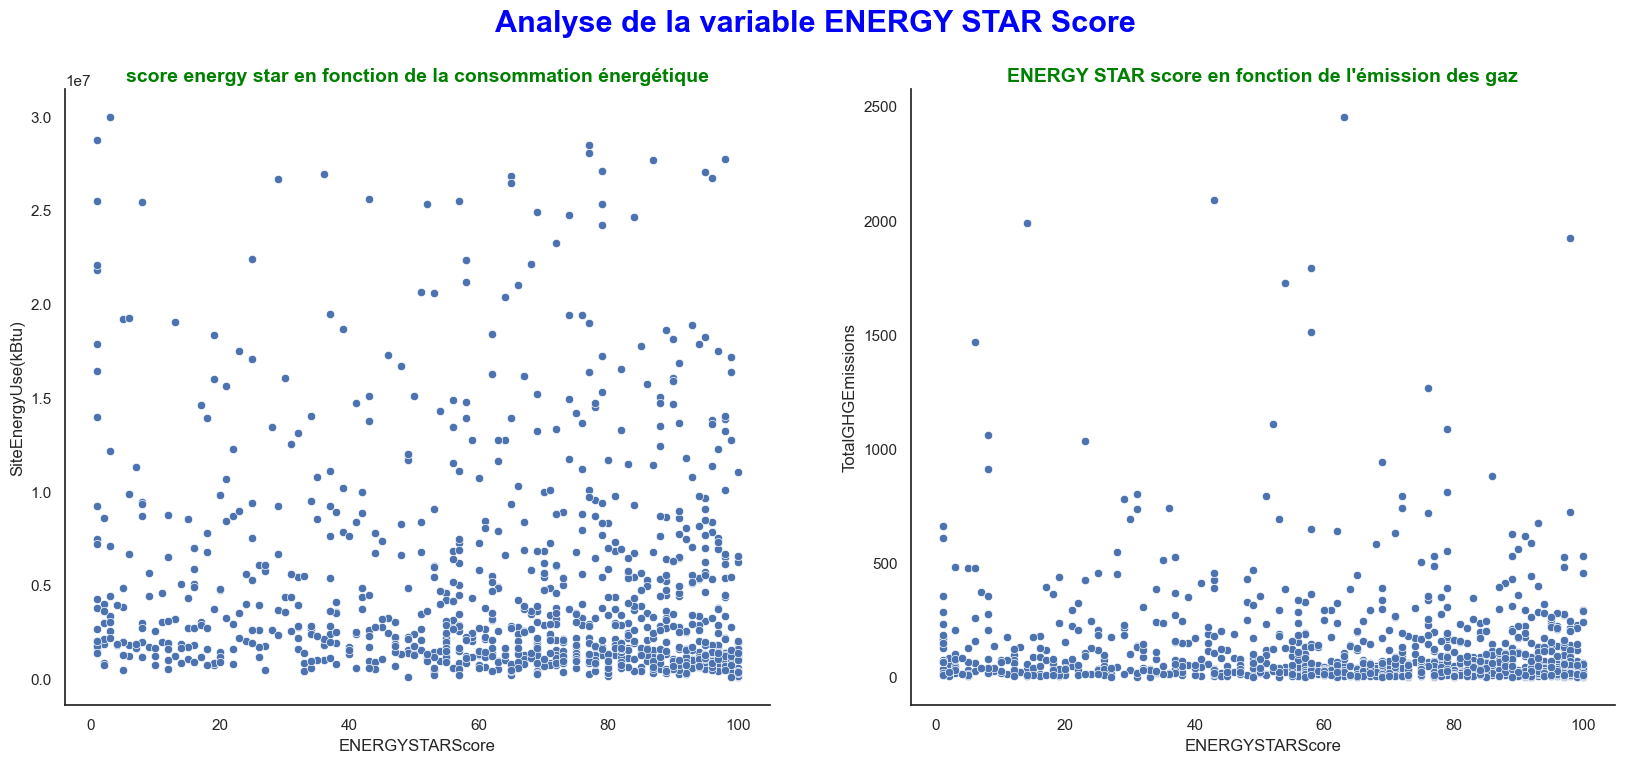

In [83]:
# Configuration des figures
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.despine()

# Tracé des nuages de points
# score energy star et consommation énergétique
sns.scatterplot(data=building_data[(building_data['SiteEnergyUse(kBtu)'] < 3 * 10**7)], x="ENERGYSTARScore", y = "SiteEnergyUse(kBtu)", ax=axes[0])
axes[0].set_title("score energy star en fonction de la consommation énergétique", color= "green", fontsize = 14,
                 fontweight = "bold")

# score energy star et l'émission des gaz à effet de serre
sns.scatterplot(data=building_data[(building_data["TotalGHGEmissions"] < 2500)], y="TotalGHGEmissions", x="ENERGYSTARScore", ax=axes[1])
axes[1].set_title("ENERGY STAR score en fonction de l'émission des gaz", color= "green", fontsize = 14,
                 fontweight = "bold")

plt.suptitle("Analyse de la variable ENERGY STAR Score", fontweight = "bold", color = "blue", fontsize=22)
plt.show()

Le score ENERGY STAR ne semble pas avoir de corrélation importante avec les émissions de gaz à effet de serre et la consommation énergétique.

### 3.2.5. Relation entre la surface total et les variables cibles

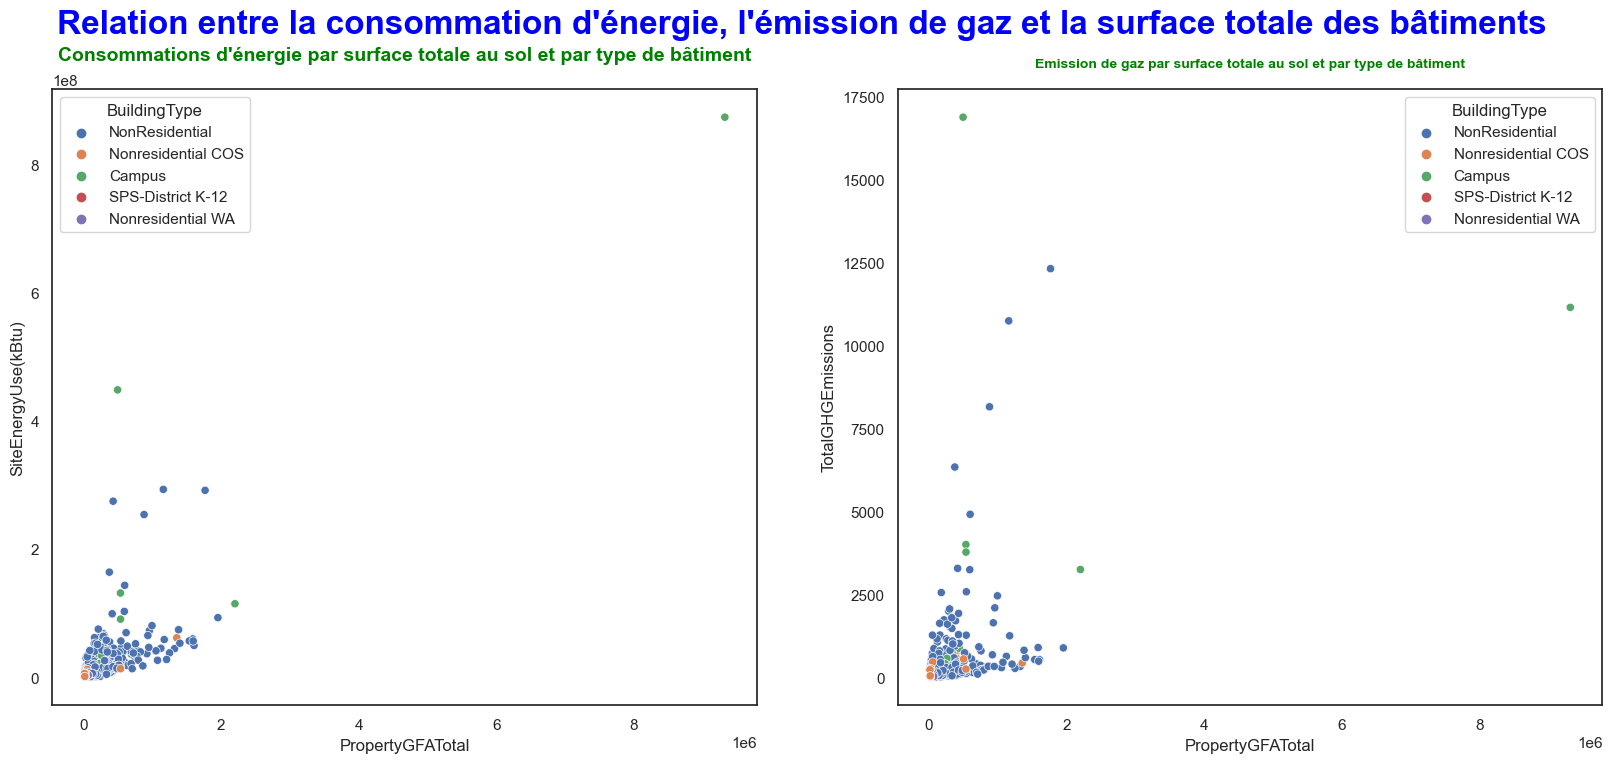

In [64]:
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))


sns.scatterplot(data = building_data, x='PropertyGFATotal', y='SiteEnergyUse(kBtu)', ax = axes[0], hue='BuildingType')
axes[0].set_title(f"Consommations d'énergie par surface totale au sol et par type de bâtiment\n", 
          fontsize = 14, fontweight = "bold", color = "green")

sns.scatterplot(data = building_data, x='PropertyGFATotal', y='TotalGHGEmissions', ax = axes[1], hue='BuildingType')
axes[1].set_title(f"Emission de gaz par surface totale au sol et par type de bâtiment\n", 
          fontsize = 10, fontweight = "bold", color = "green")

plt.suptitle("Relation entre la consommation d'énergie, l'émission de gaz et la surface totale des bâtiments",
            fontsize = 24, fontweight = "bold", color = "blue")
plt.show()

Un bâtiment de type campus à une consommation énergétique largement supérieure aux autres. Il doit sans dout s'agit du campus identifié précedemment, possédant 111 bâtiments. Il ne s'agit pas d'une valeur abérrante mais d'une valeur atypique. Nous allons la supprimer du jeu de données, car elle pourrait influencer la modélisation.

In [65]:
# Sélection da la propriété à la consommation largement supérieure aux autres
building_data[building_data[("SiteEnergyUse(kBtu)")]> 8*10**8]

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEUI(kBtu/sf),SourceEUI(kBtu/sf),SiteEnergyUse(kBtu),SteamUse(kBtu),Electricity(kBtu),NaturalGas(kBtu),DefaultData,ComplianceStatus,TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
3274,49967,2016,Campus,University,University of Washington - Seattle Campus,NE 45th St & Brooklyn Ave,Seattle,WA,98105.0,1625049001,4,NORTHEAST,47.65644,-122.31041,111.0,0,9320156,0,9320156,College/University,College/University,9320156.0,Unknown,0.0,Unknown,0.0,NaN,93.800003,246.600006,873923712.0,84985240.0,657074389.0,0.0,False,Compliant,11140.56,1.2,116


In [66]:
building_data.shape

(1545, 38)

In [67]:
# Suppression de la valeur atypique du jeu de données
building_data = building_data[building_data[("SiteEnergyUse(kBtu)")] < 8*10**8]

In [68]:
building_data.shape

(1544, 38)

### 3.2.4. Géolocalisation des bâtiments
**_Visualisation de la géolocalisation des bâtiments sur la carte de Seattle_** 

In [69]:
# Importation des librairies utilent pour l'affichage de la carte
import folium
import folium.plugins

In [70]:
# Projection des bâtiments à partir du centre de Seattle

# coordonnées du centre de Seattle
Latitude_Seattle = 47.6062095
Longitude_Seattle = -122.3320708

# Tracer de la carte de Seattle
carte_seattle = folium.Map(location=[47.6062095, -122.3320708], )

# Localisation des bâtiments sur la carte de Seattle
marker_cluster = folium.plugins.MarkerCluster().add_to(carte_seattle)
for lat, lng, in zip(building_data.Latitude, building_data.Longitude):
    folium.Marker(location=[lat, lng]).add_to(marker_cluster)

carte_seattle

La ville de Seattl est située entre le Puget Sound et le lac Washington. Certains bâtiments sont plus proche de l'Océan que d'autres. Est-ce que cette géolocalisation à un impact sur les consommations d'énergie et les émissions des gaz de ces bâtiments ?

**_Impact de la géolocalisation des bâtiments sur leurs consommation d'énergie et émissions de gaz_**

Je vais utiliser le centre de Seattle comme référence pour le calcul de la distance séparant le centre ville de chaque point de coordonnées. En partant du principe que plus un bâtiment est éloigné du centre ville, plus il est proche de l'océan ou du lac.

In [71]:
from math import radians, cos, sin, asin, sqrt

# Définition de la fonction pour le calcul des distances
def haversine_distance(lat1, lng1, lat2, lng2, degrees=True):
    """
    Calcul la distance orthodromique en kilomètres entre deux points sur la terre (spécifié en degrés décimaux)
    """
    r = 6371 # rayon de la Terre en Kilomètre
    
    # Conversion des degrés décimaux en radians
    if degrees:
        lat1, lng1, lat2, lng2 = map(radians, [lat1, lng1, lat2, lng2])
    
    # Formule Haversine
    dlng = lng2 - lng1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlng/2)**2
    d = 2 * asin(sqrt(a))  

    return d * r

In [72]:
#Calcul des distance au centre de Seattle pour chaque point
building_data["harvesine_distance"] = [haversine_distance(Latitude_Seattle, Longitude_Seattle, x, y) 
                              for x, y in zip(building_data.Latitude.astype(float), building_data.Longitude.astype(float))]

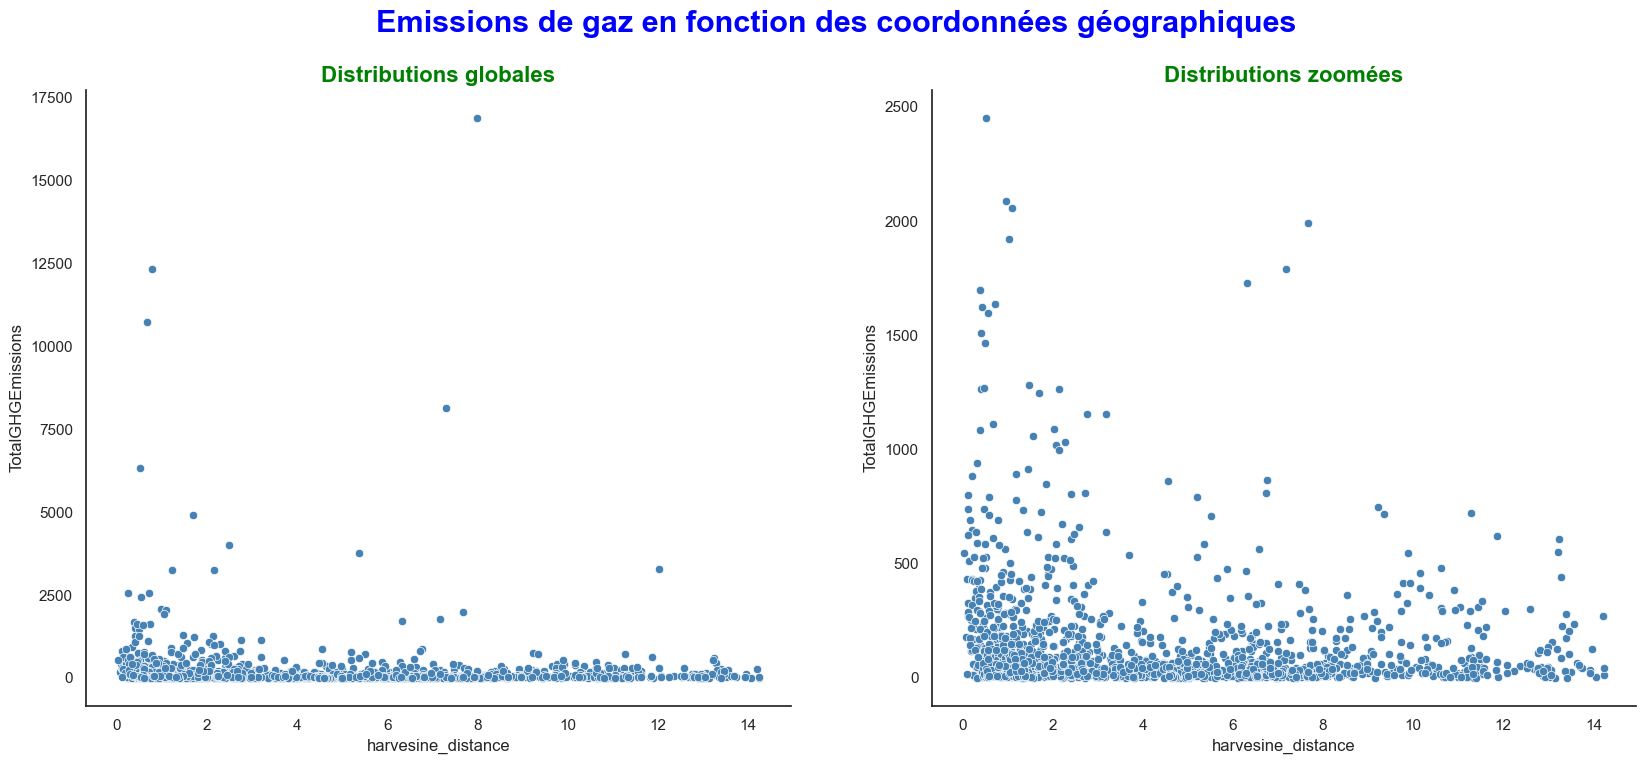

In [73]:
# Tracer des figures pour l'analyse

# Configuration du tracé
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.despine()
axes
# Tracer des nuages des points
sns.scatterplot(data=building_data, y="TotalGHGEmissions", x="harvesine_distance", color="steelblue", ax=axes[0])
axes[0].set_title("Distributions globales", color='green', fontweight = "bold", fontsize=16)

sns.scatterplot(data = building_data[(building_data['TotalGHGEmissions'] < 2500)], y="TotalGHGEmissions", 
                x="harvesine_distance", color="steelblue", ax=axes[1])
axes[1].set_title("Distributions zoomées", color="green", fontweight = "bold", fontsize=16)

plt.suptitle("Emissions de gaz en fonction des coordonnées géographiques", color = "blue", fontweight = "bold", fontsize=22)
plt.show()

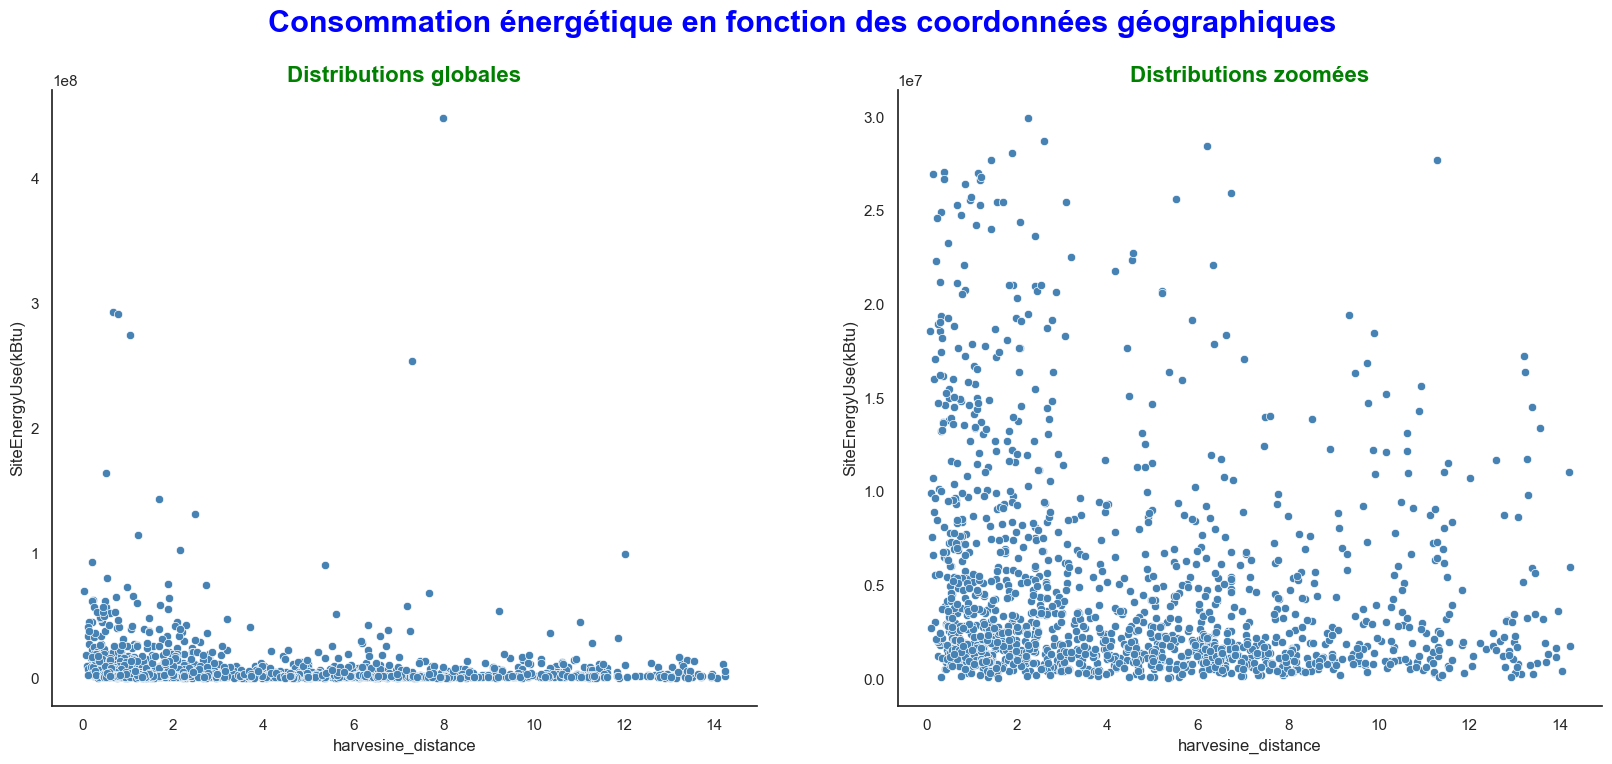

In [74]:
# Configuration du tracé
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False, figsize=(20,8))
sns.despine()

# Tracer des nuages des points
sns.scatterplot(data=building_data, y="SiteEnergyUse(kBtu)", x="harvesine_distance", color="steelblue", ax=axes[0])
axes[0].set_title("Distributions globales", color='green', fontweight = "bold", fontsize=16)


sns.scatterplot(data = building_data[(building_data['SiteEnergyUse(kBtu)'] < 3 * 10**7)], y="SiteEnergyUse(kBtu)", 
                x="harvesine_distance", color="steelblue", ax=axes[1])
axes[1].set_title("Distributions zoomées", color="green", fontweight = "bold", fontsize=16)

plt.suptitle("Consommation énergétique en fonction des coordonnées géographiques", color = "blue", 
             fontweight = "bold", fontsize=22)
plt.show()

**_Observation :_**
La distribution des points sur l'ensemble des graphiques est indépendante de la distance de harvesine. La géolocalisation d'un bâtiment n'influence donc pas sur sa consommation énergétique et ses émissions de gaz à effet de serre.

## 4. Suite du nettoyage

Maintenant que l'analyse des données est terminée, on peut poursuivre le nettoyage et supprimer les variables non pertinentes.

In [75]:
building_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1544 entries, 0 to 3375
Data columns (total 39 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   OSEBuildingID                    1544 non-null   int64  
 1   DataYear                         1544 non-null   int64  
 2   BuildingType                     1544 non-null   object 
 3   PrimaryPropertyType              1544 non-null   object 
 4   PropertyName                     1544 non-null   object 
 5   Address                          1544 non-null   object 
 6   City                             1544 non-null   object 
 7   State                            1544 non-null   object 
 8   ZipCode                          1531 non-null   float64
 9   TaxParcelIdentificationNumber    1544 non-null   object 
 10  CouncilDistrictCode              1544 non-null   int64  
 11  Neighborhood                     1544 non-null   object 
 12  Latitude            

In [76]:
# Suppression des variables "Latitude" et "Longitude" pour conserver uniquement la distance haversine
building_data.drop(columns = ["Latitude", "Longitude"], inplace = True)

Les variables DefaultData,TaxParcelIdentificationNumber, CouncilDistrictCode, State et City n'apportent pas d'informations pertinentes pour l'objectif de ce projet, je procède à leur suppression. <br> Le jeu de données a été restreint aux données correctement renseignées à partir de la variable "ComplianceStatus". Je supprime également cette dernière.

In [77]:
building_data.drop(columns = ["DefaultData", "ComplianceStatus", "TaxParcelIdentificationNumber",
                             "CouncilDistrictCode", "State", "City"], inplace = True)

In [78]:
building_data.shape

(1544, 31)

In [79]:
building_data.isna().sum().sum()

562

<AxesSubplot:>

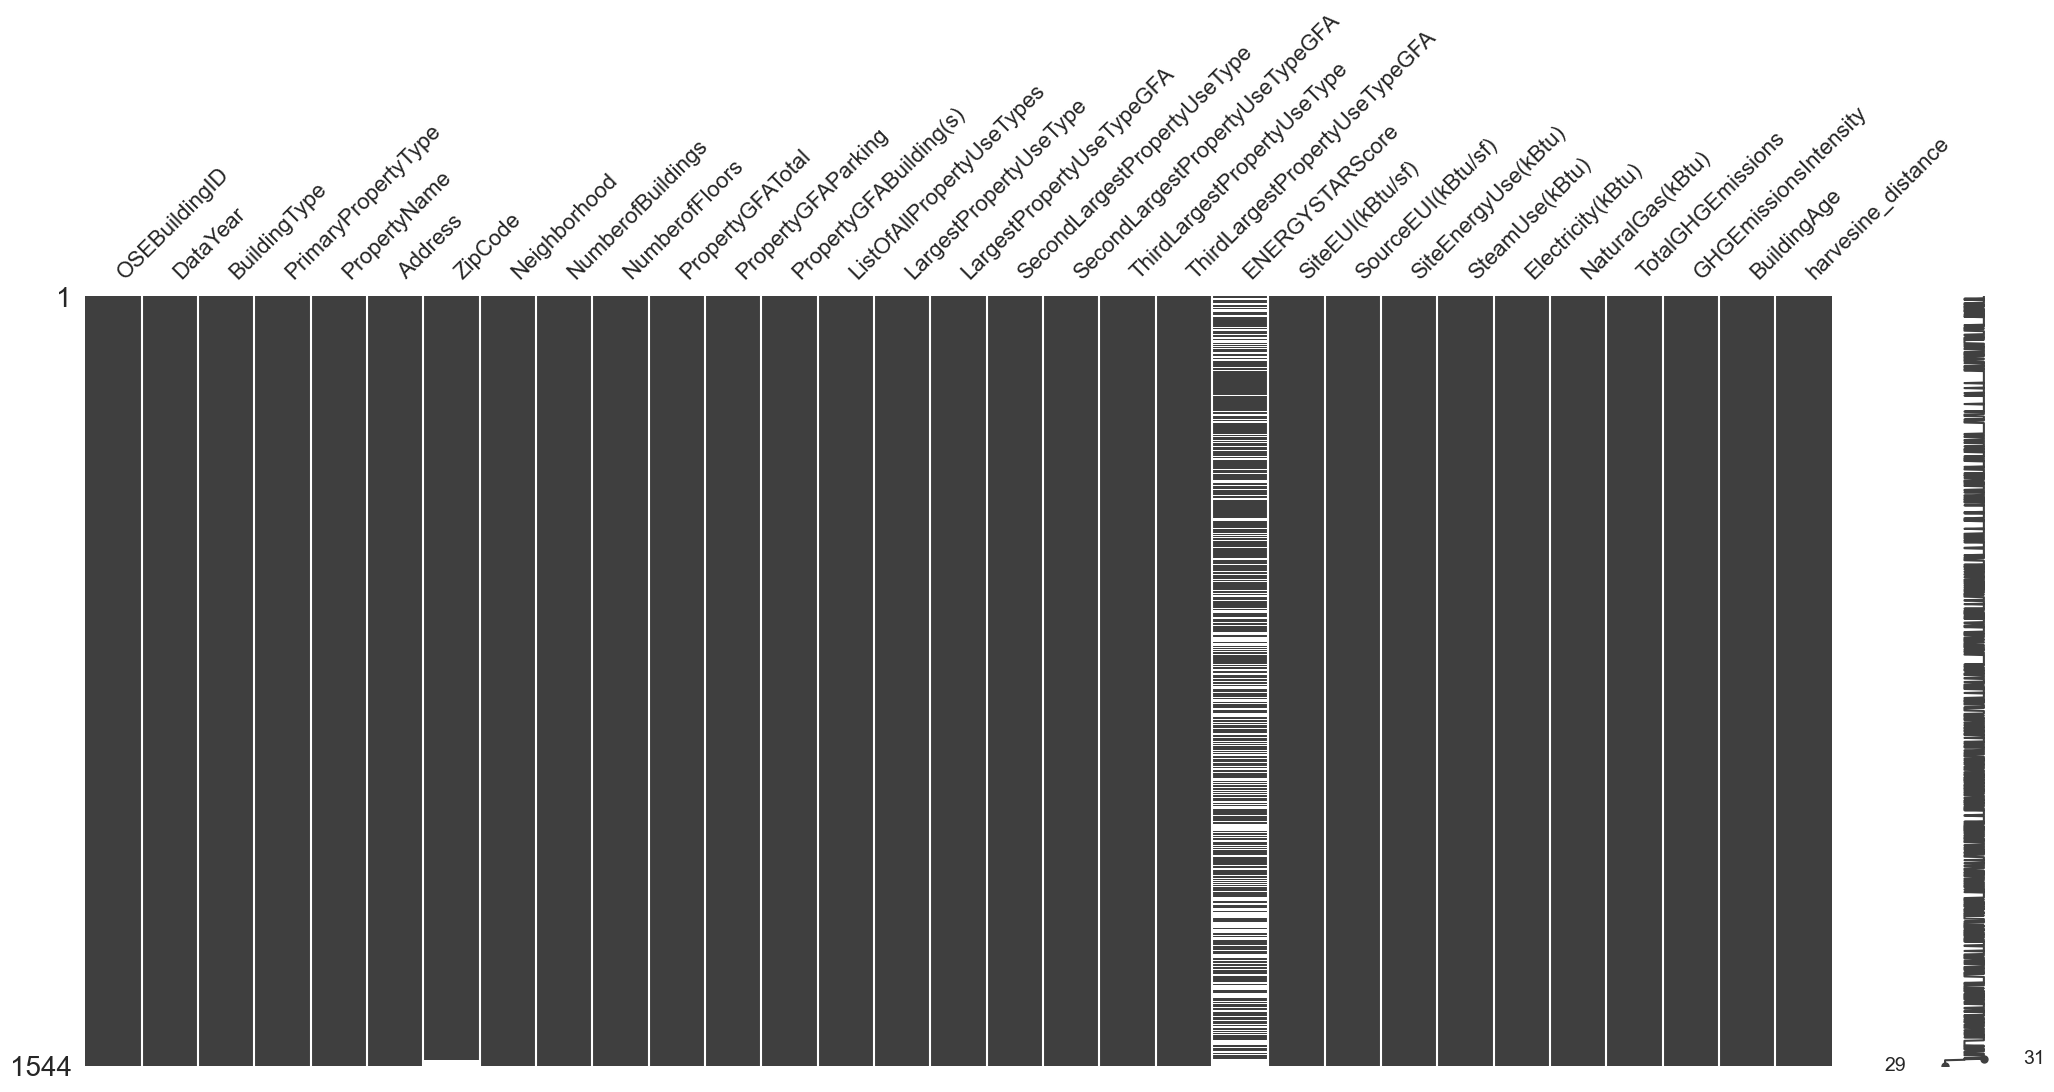

In [81]:
msno.matrix(building_data)

**_Exportation des données pour le feature engineering_**

In [80]:
building_data.set_index("OSEBuildingID").to_csv("building_data_cleaned.csv")